# import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (21, 9)
plt.rcParams['figure.dpi'] = 300

# read data

In [3]:
COLUMNS=[
    'manufacturer',
    'model',
    'vehicle_condition',
    'battery_capacity',
    'drivetrain',
    'mileage',
    'warranty_period',
    'accident_history',
    'year_of_manufacture',
]
SEED = 42

In [4]:
train = pd.read_csv('./data/train.csv')
train = train.drop(columns=['ID'])
train.columns = COLUMNS + ['y']
train.manufacturer = train.manufacturer.str.replace('사', '_corp')

test = pd.read_csv('./data/test.csv')
test = test.drop(columns=['ID'])
test.columns = COLUMNS
test_X = test
test_X.manufacturer = test_X.manufacturer.str.replace('사', '_corp')

In [5]:
train

,manufacturer,model,vehicle_condition,battery_capacity,drivetrain,mileage,warranty_period,accident_history,year_of_manufacture,y
0,P_corp,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,K_corp,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,A_corp,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,A_corp,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,B_corp,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...
7492,H_corp,ION5,Brand New,NaN,AWD,3773,10,No,0,35.95
7493,B_corp,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7494,P_corp,TayCT,Brand New,NaN,AWD,1363,2,No,0,120.00
7495,B_corp,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


# eda

In [6]:
train.dtypes

manufacturer            object
model                   object
vehicle_condition       object
battery_capacity       float64
drivetrain              object
mileage                  int64
warranty_period          int64
accident_history        object
year_of_manufacture      int64
y                      float64
dtype: object

In [7]:
train.select_dtypes(include='number')

,battery_capacity,mileage,warranty_period,year_of_manufacture,y
0,86.077,13642,0,2,159.66
1,56.000,10199,6,0,28.01
2,91.200,2361,7,0,66.27
3,NaN,21683,3,0,99.16
4,61.018,178205,1,0,62.02
...,...,...,...,...,...
7492,NaN,3773,10,0,35.95
7493,46.000,135411,2,0,23.40
7494,NaN,1363,2,0,120.00
7495,56.000,39445,6,2,24.00


mean         62.331949
std          36.646759
min           9.000000
max         161.090000
median       56.000000
skew          1.003336
kurtosis      0.358010
Name: y, dtype: float64

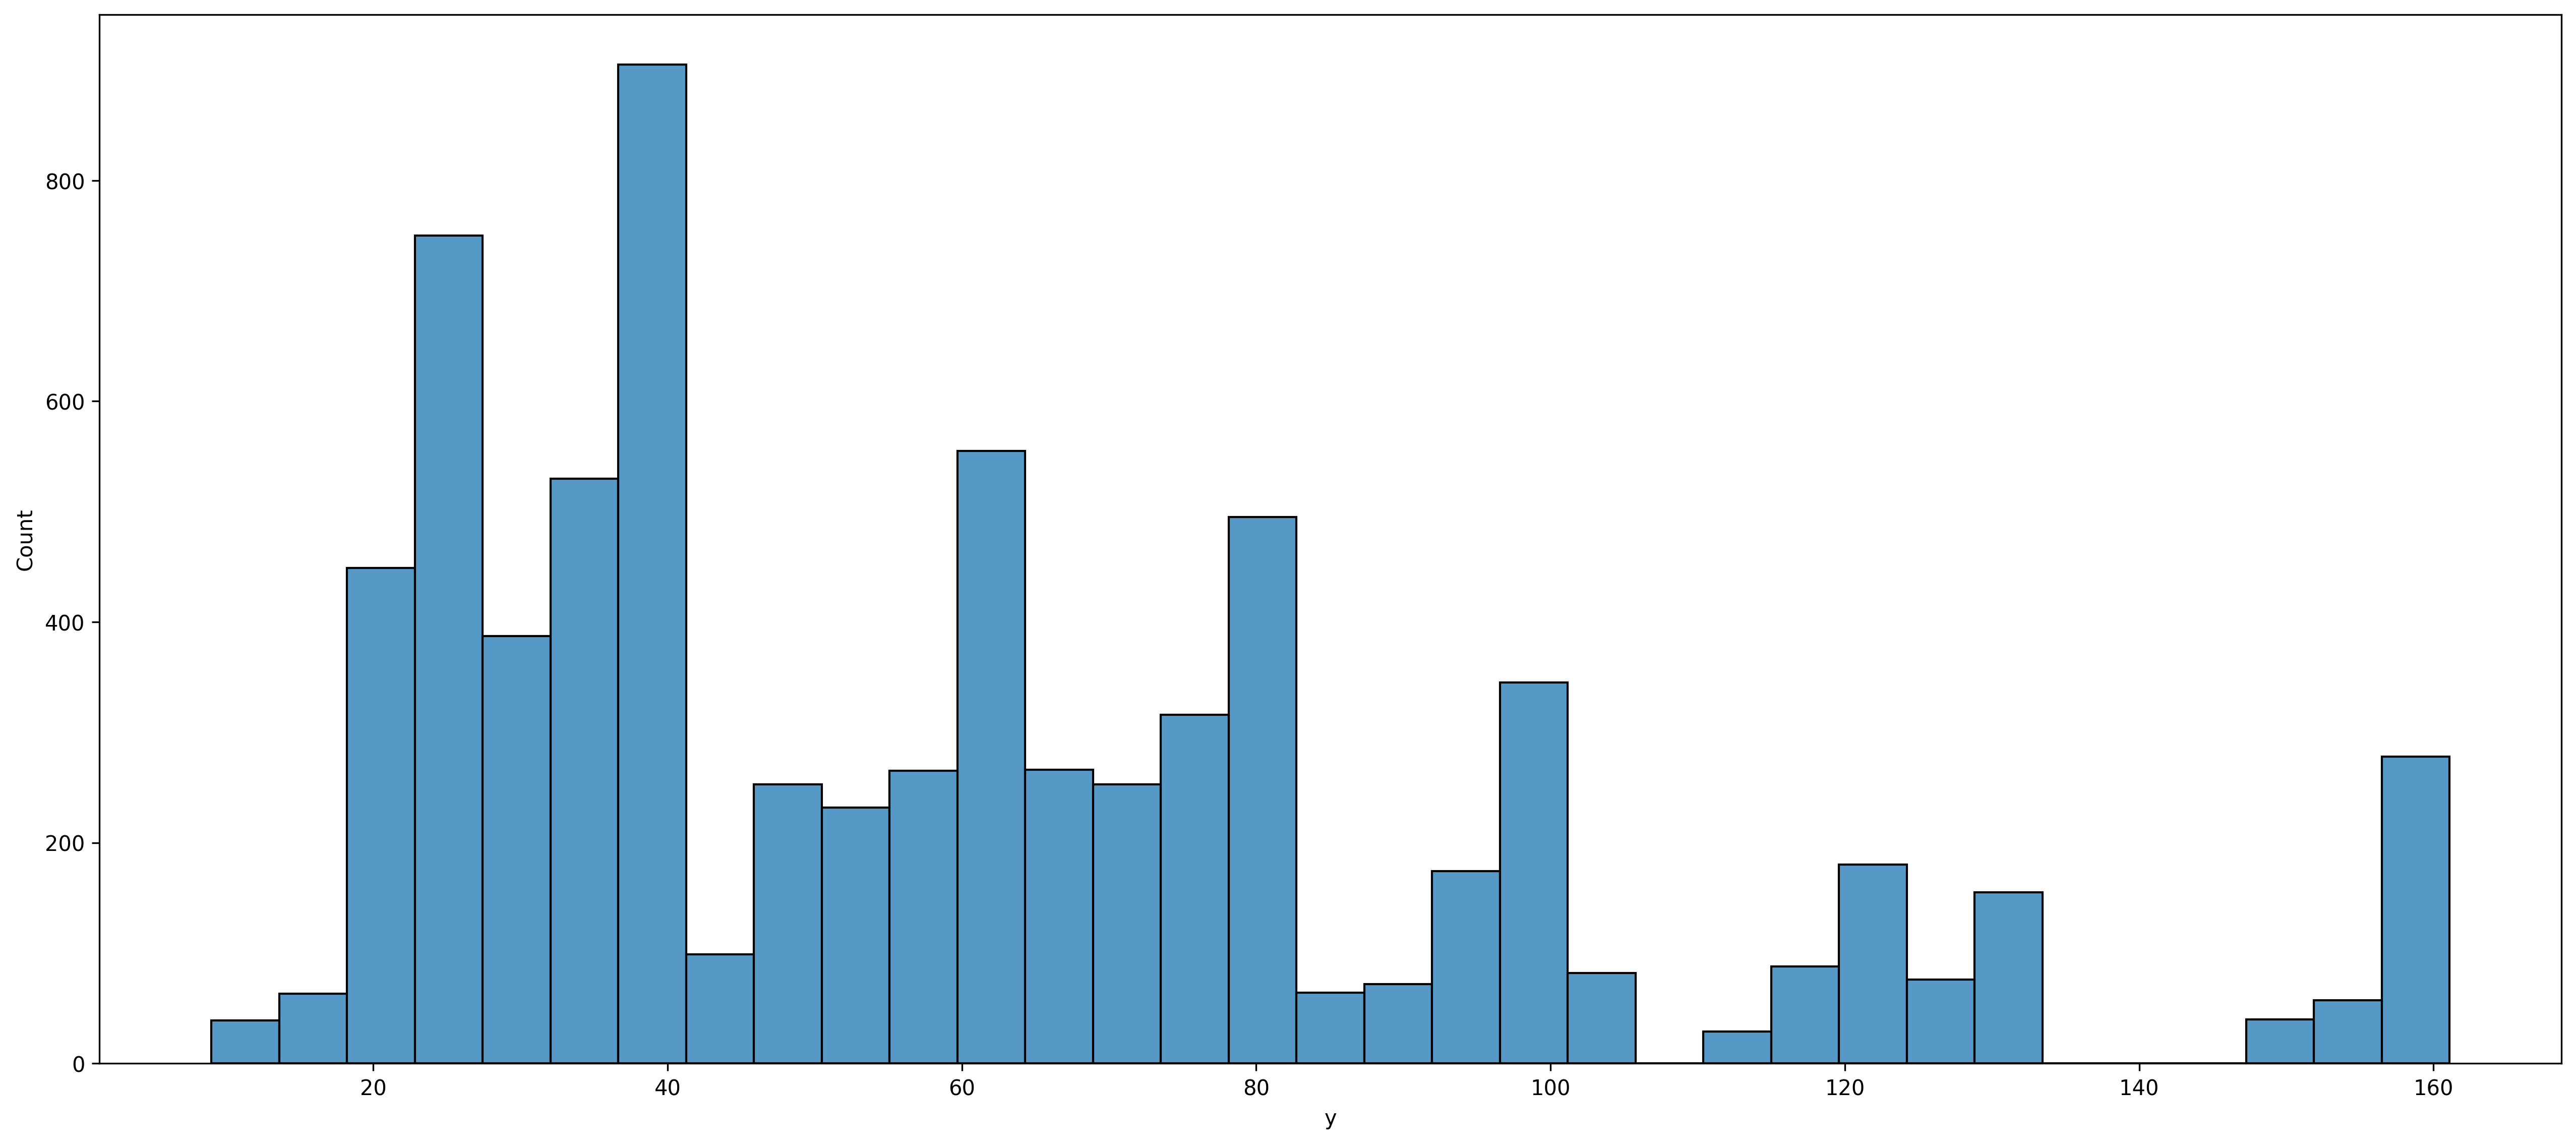

In [55]:
sns.histplot(train.y)
train.y.agg(['mean', 'std', 'min', 'max', 'median', 'skew', 'kurtosis'])

mean        3.963688
std         0.587838
min         2.197225
max         5.081963
median      4.025352
skew        0.002488
kurtosis   -0.841963
Name: y, dtype: float64

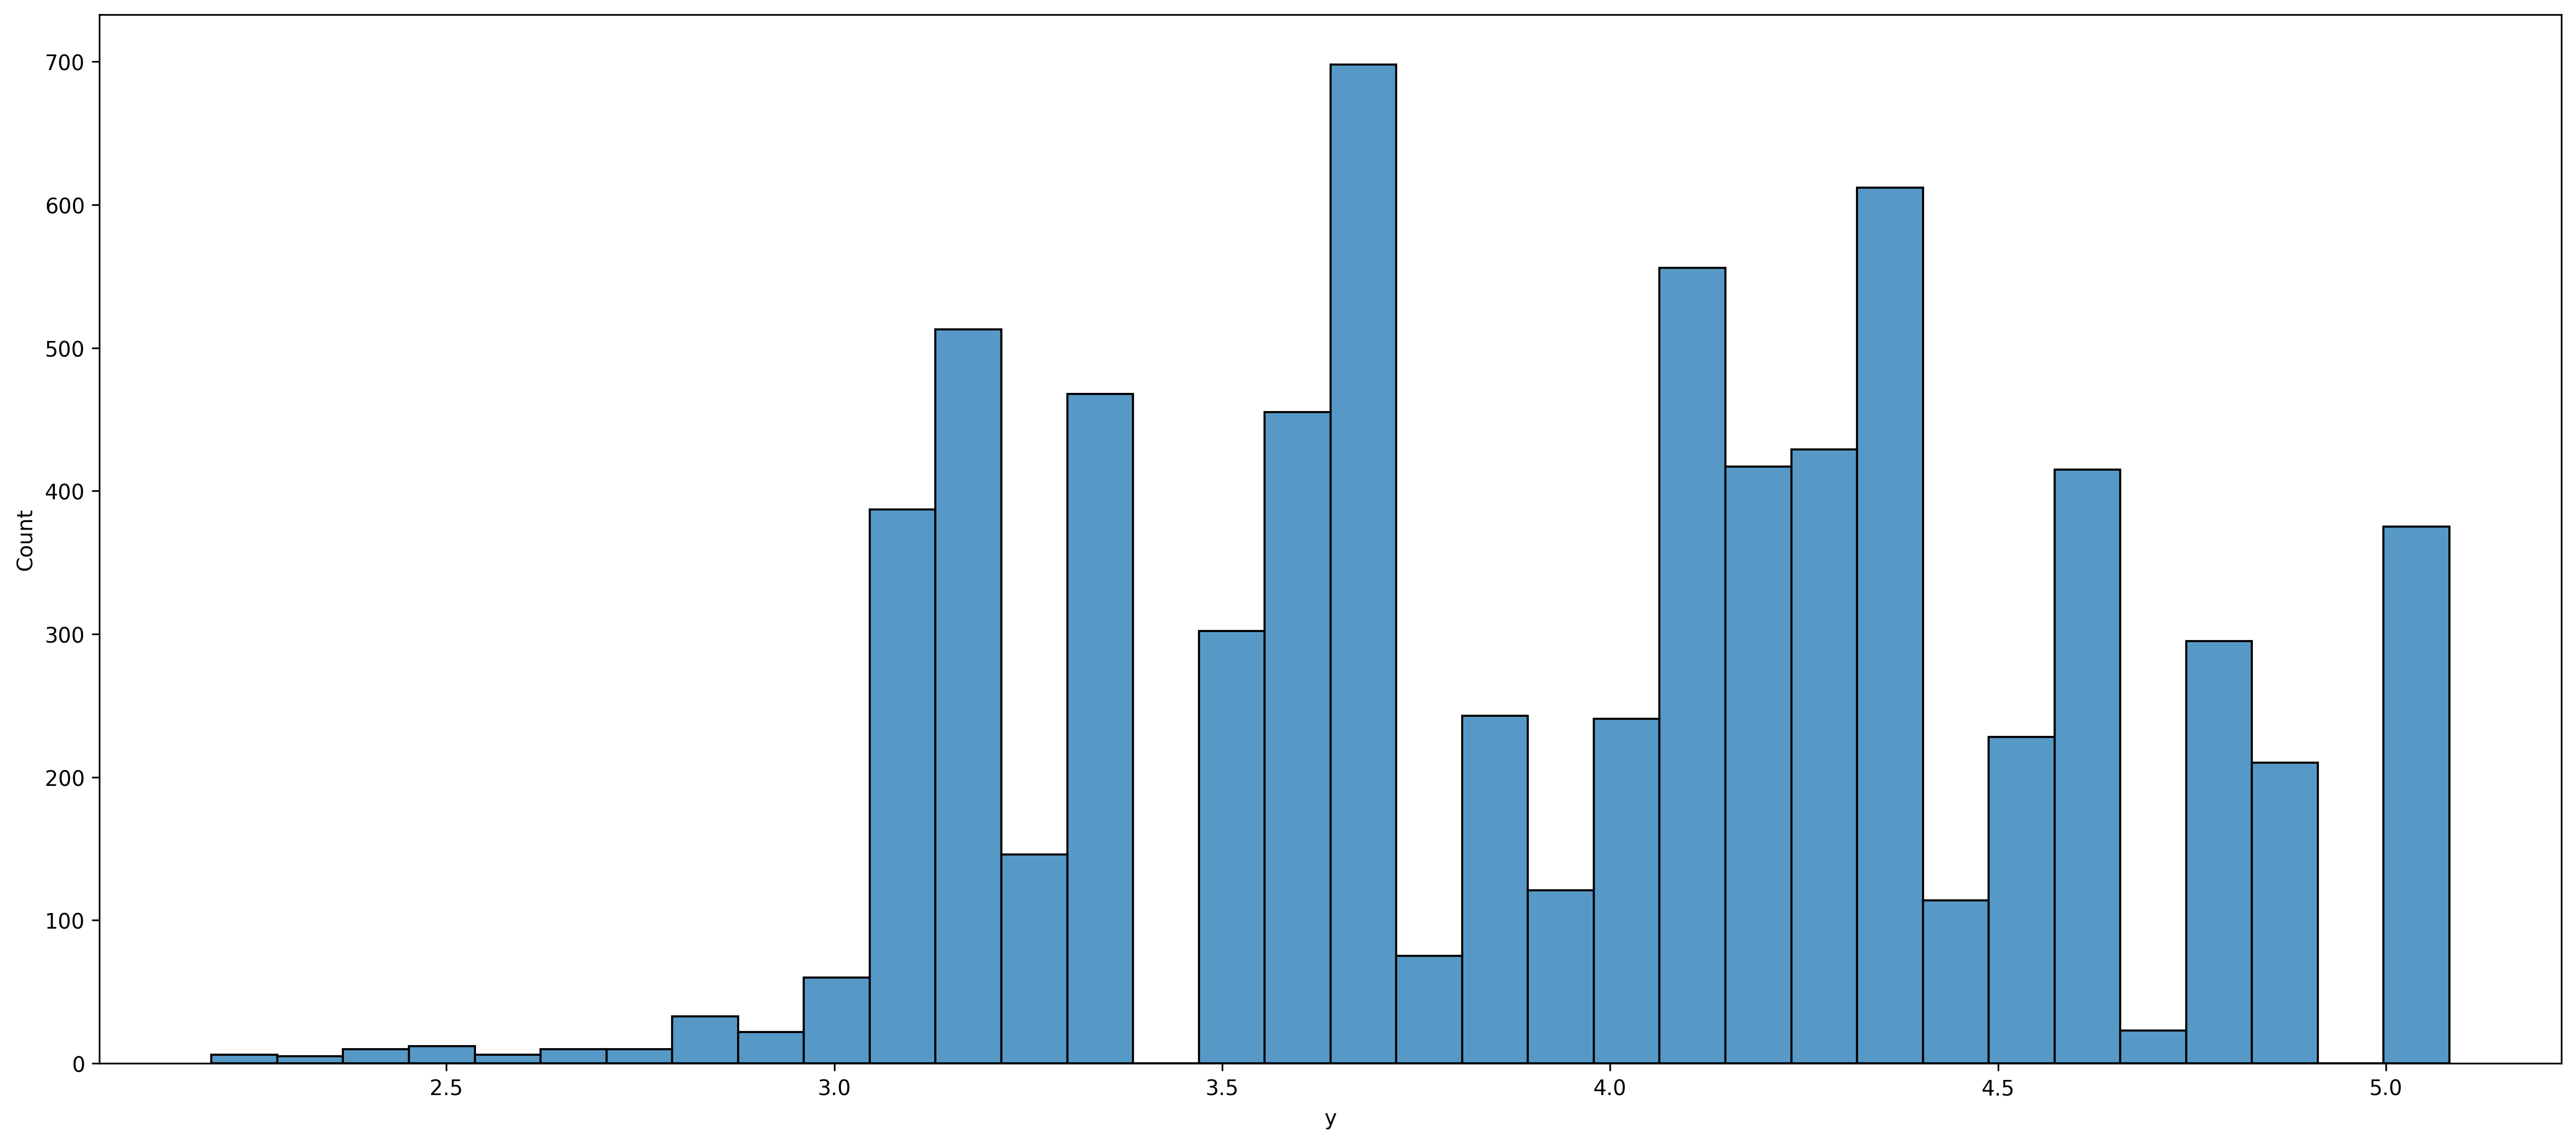

In [56]:
sns.histplot(np.log(train.y))
np.log(train.y).agg(['mean', 'std', 'min', 'max', 'median', 'skew', 'kurtosis'])

In [57]:
train.isna().sum(), test.isna().sum()

(manufacturer              0
 model                     0
 vehicle_condition         0
 battery_capacity       2711
 drivetrain                0
 mileage                   0
 warranty_period           0
 accident_history          0
 year_of_manufacture       0
 y                         0
 dtype: int64,
 manufacturer             0
 model                    0
 vehicle_condition        0
 battery_capacity       304
 drivetrain               0
 mileage                  0
 warranty_period          0
 accident_history         0
 year_of_manufacture      0
 dtype: int64)

### Fillna

In [58]:
train.battery_capacity.describe()

count    4786.000000
mean       69.397187
std        15.283635
min        46.000000
25%        56.359000
50%        68.125000
75%        78.227000
max        99.800000
Name: battery_capacity, dtype: float64

In [59]:
train['battery_capacity'] = train['battery_capacity'].fillna(0)
test['battery_capacity'] = test['battery_capacity'].fillna(0)

In [60]:
train.isna().sum(), test.isna().sum()

(manufacturer           0
 model                  0
 vehicle_condition      0
 battery_capacity       0
 drivetrain             0
 mileage                0
 warranty_period        0
 accident_history       0
 year_of_manufacture    0
 y                      0
 dtype: int64,
 manufacturer           0
 model                  0
 vehicle_condition      0
 battery_capacity       0
 drivetrain             0
 mileage                0
 warranty_period        0
 accident_history       0
 year_of_manufacture    0
 dtype: int64)

## histograms

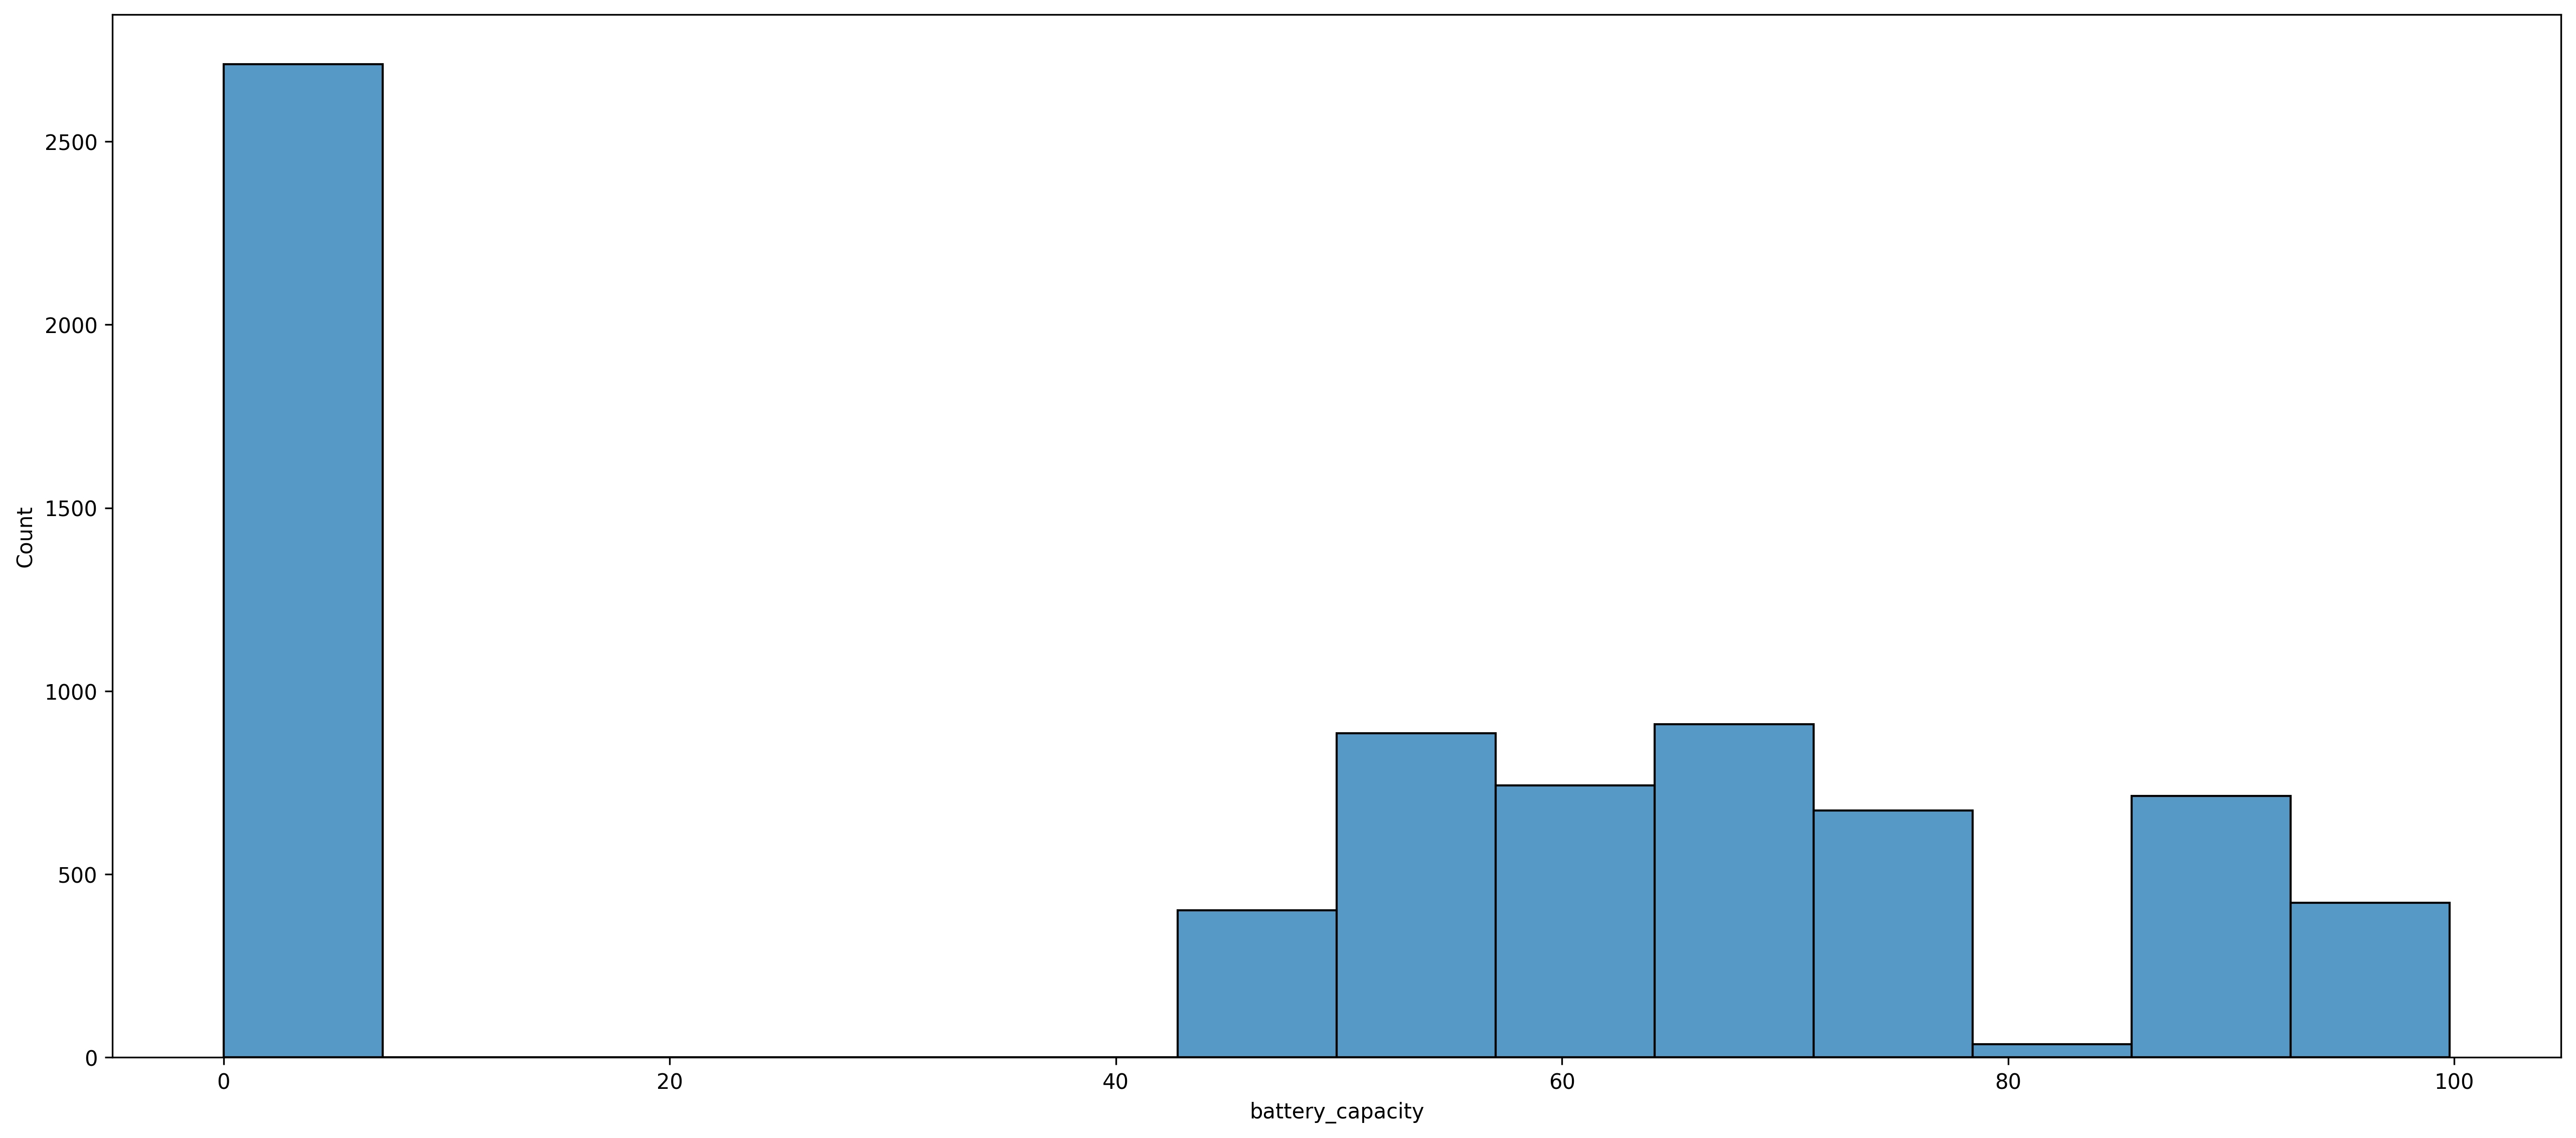

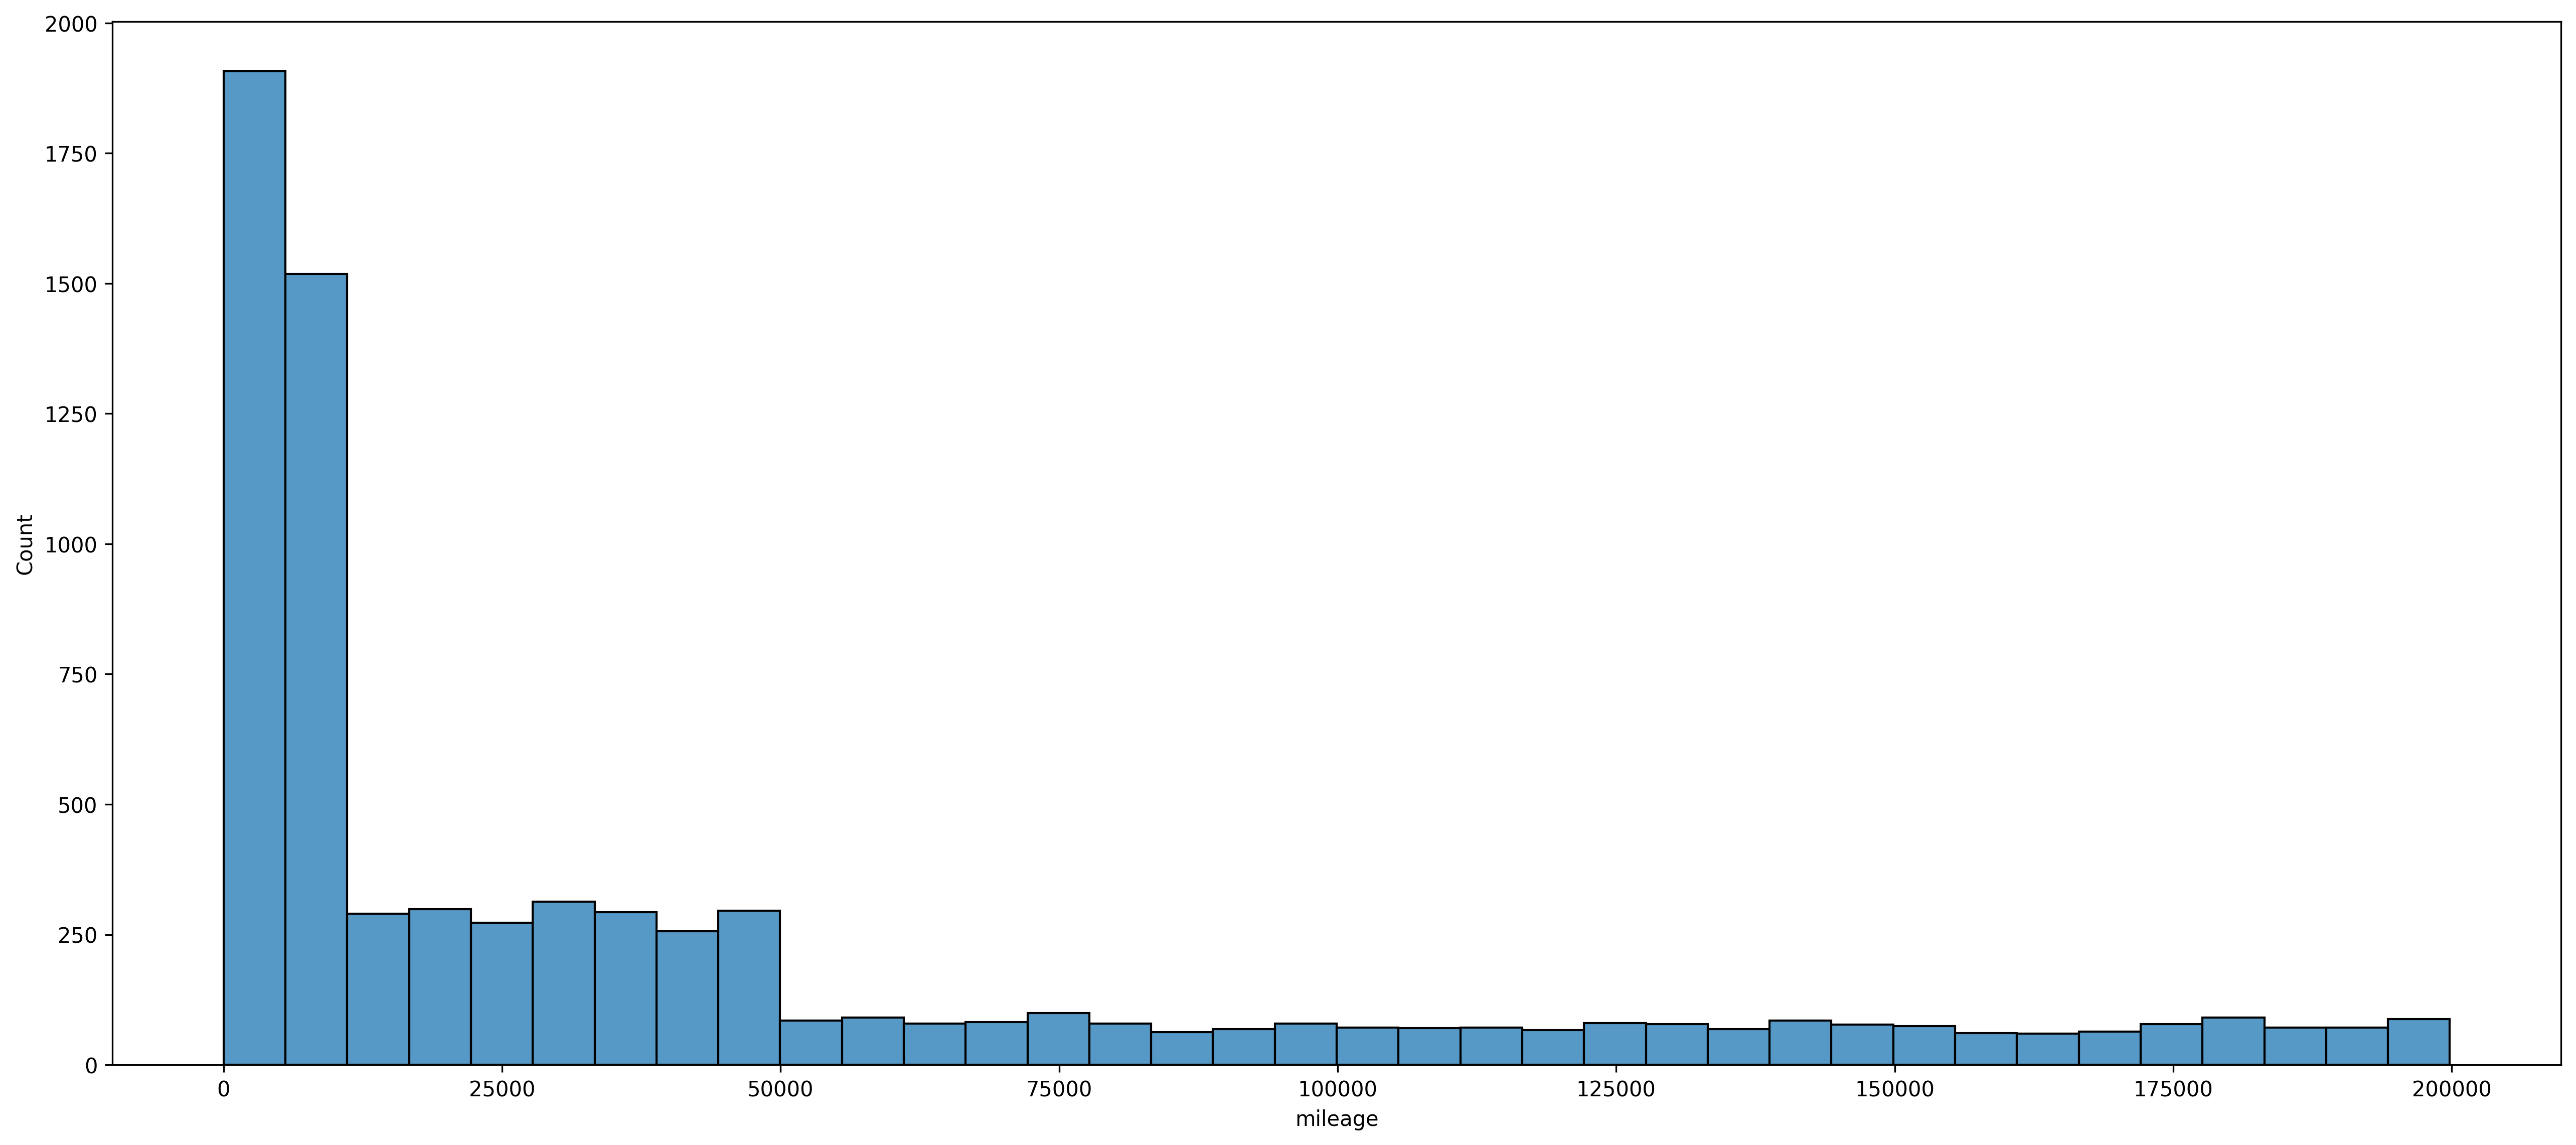

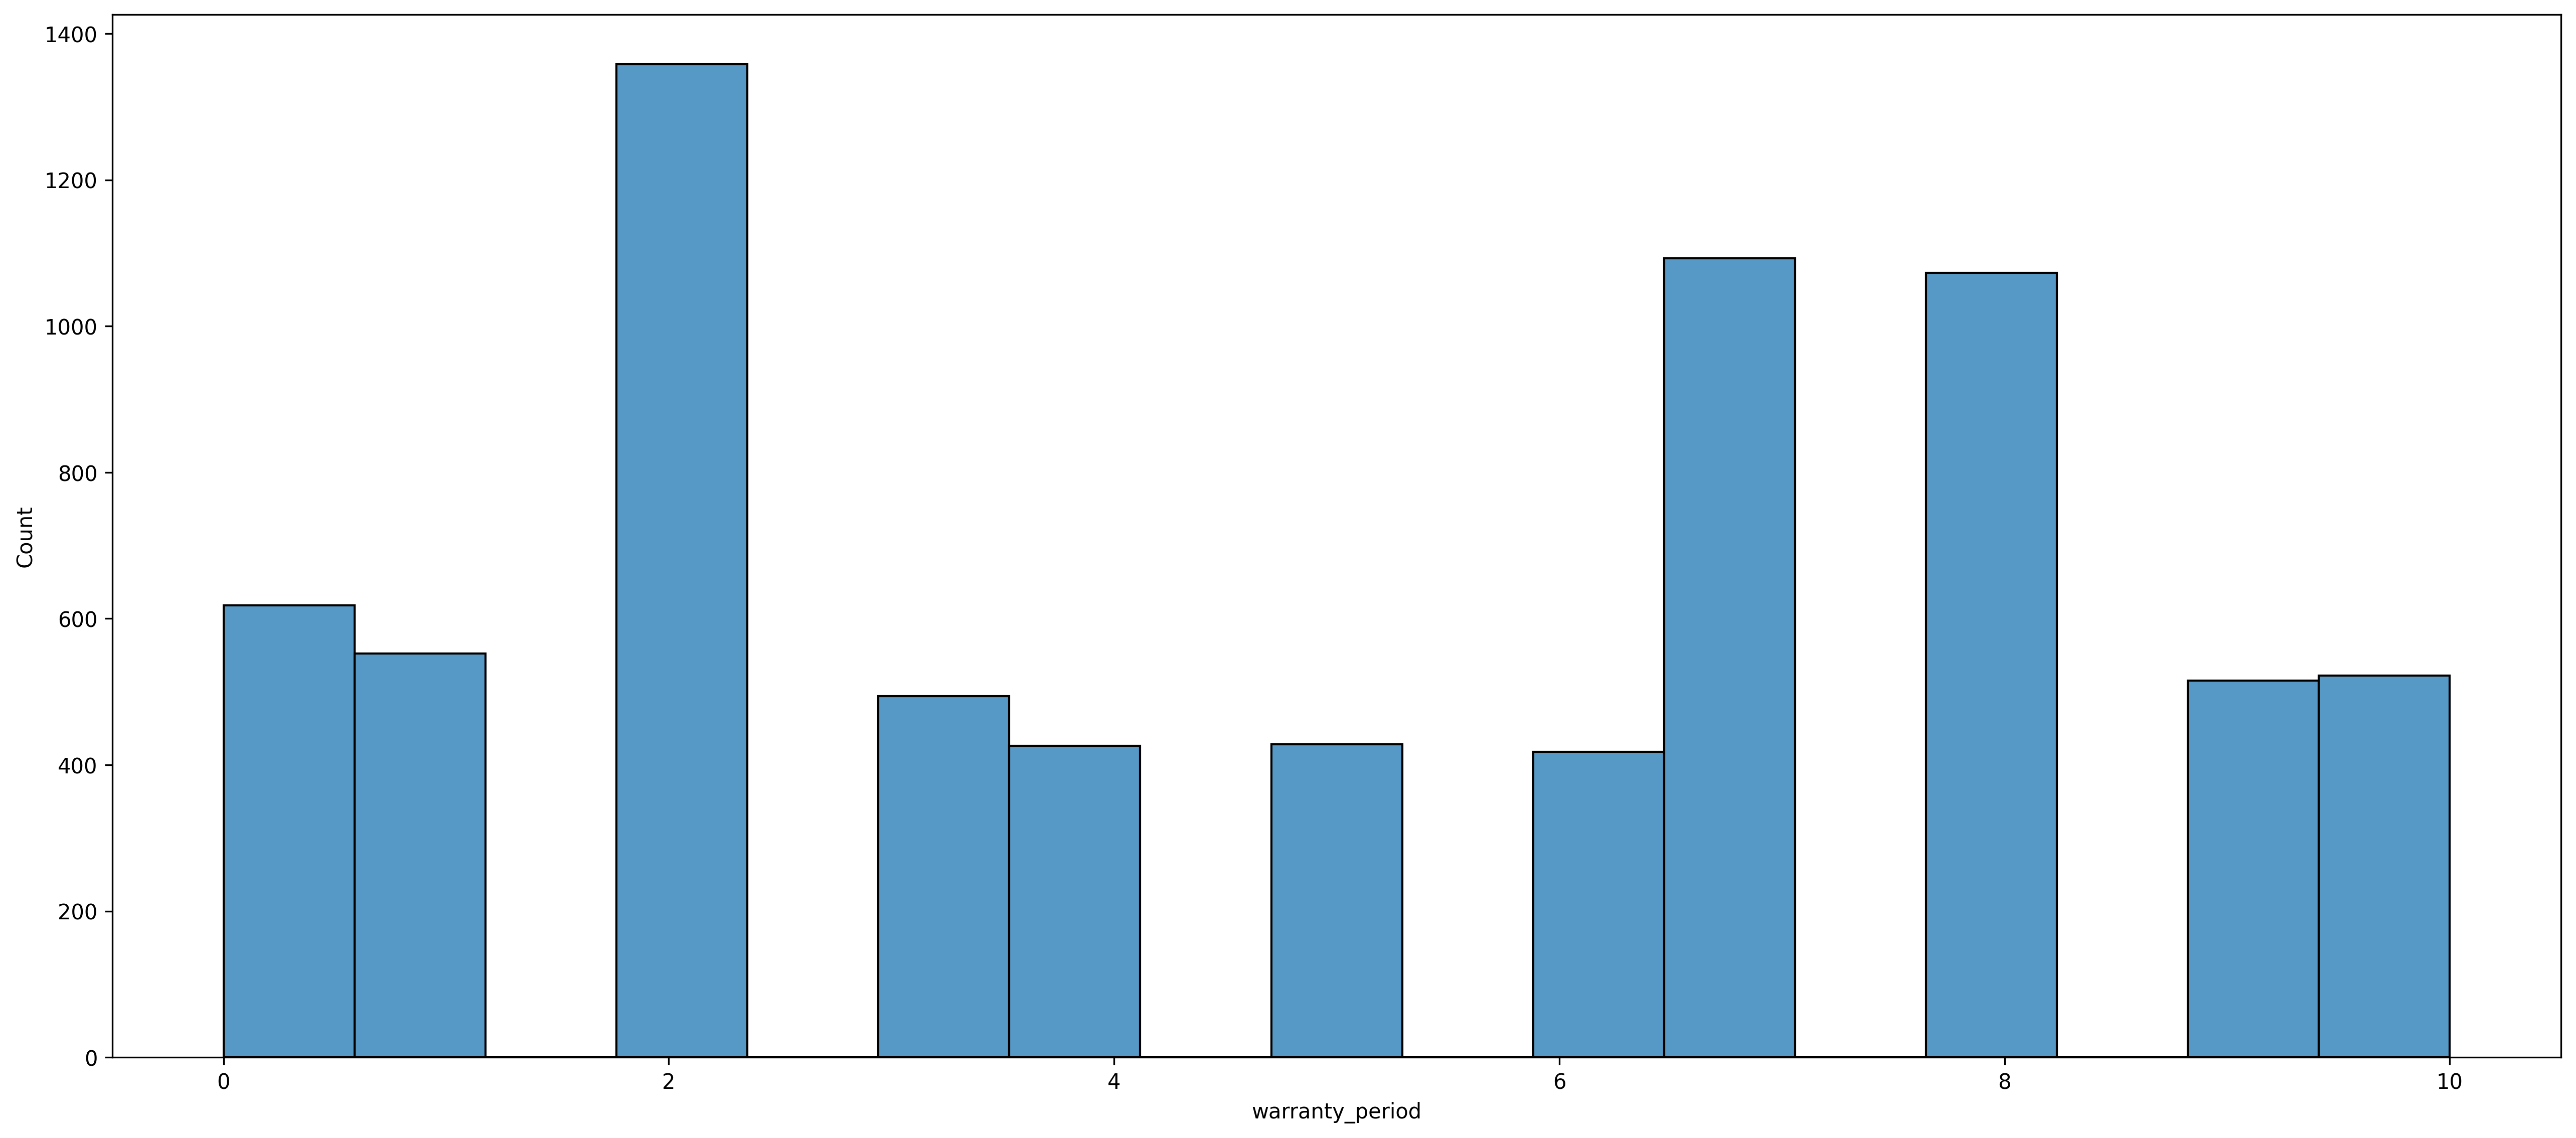

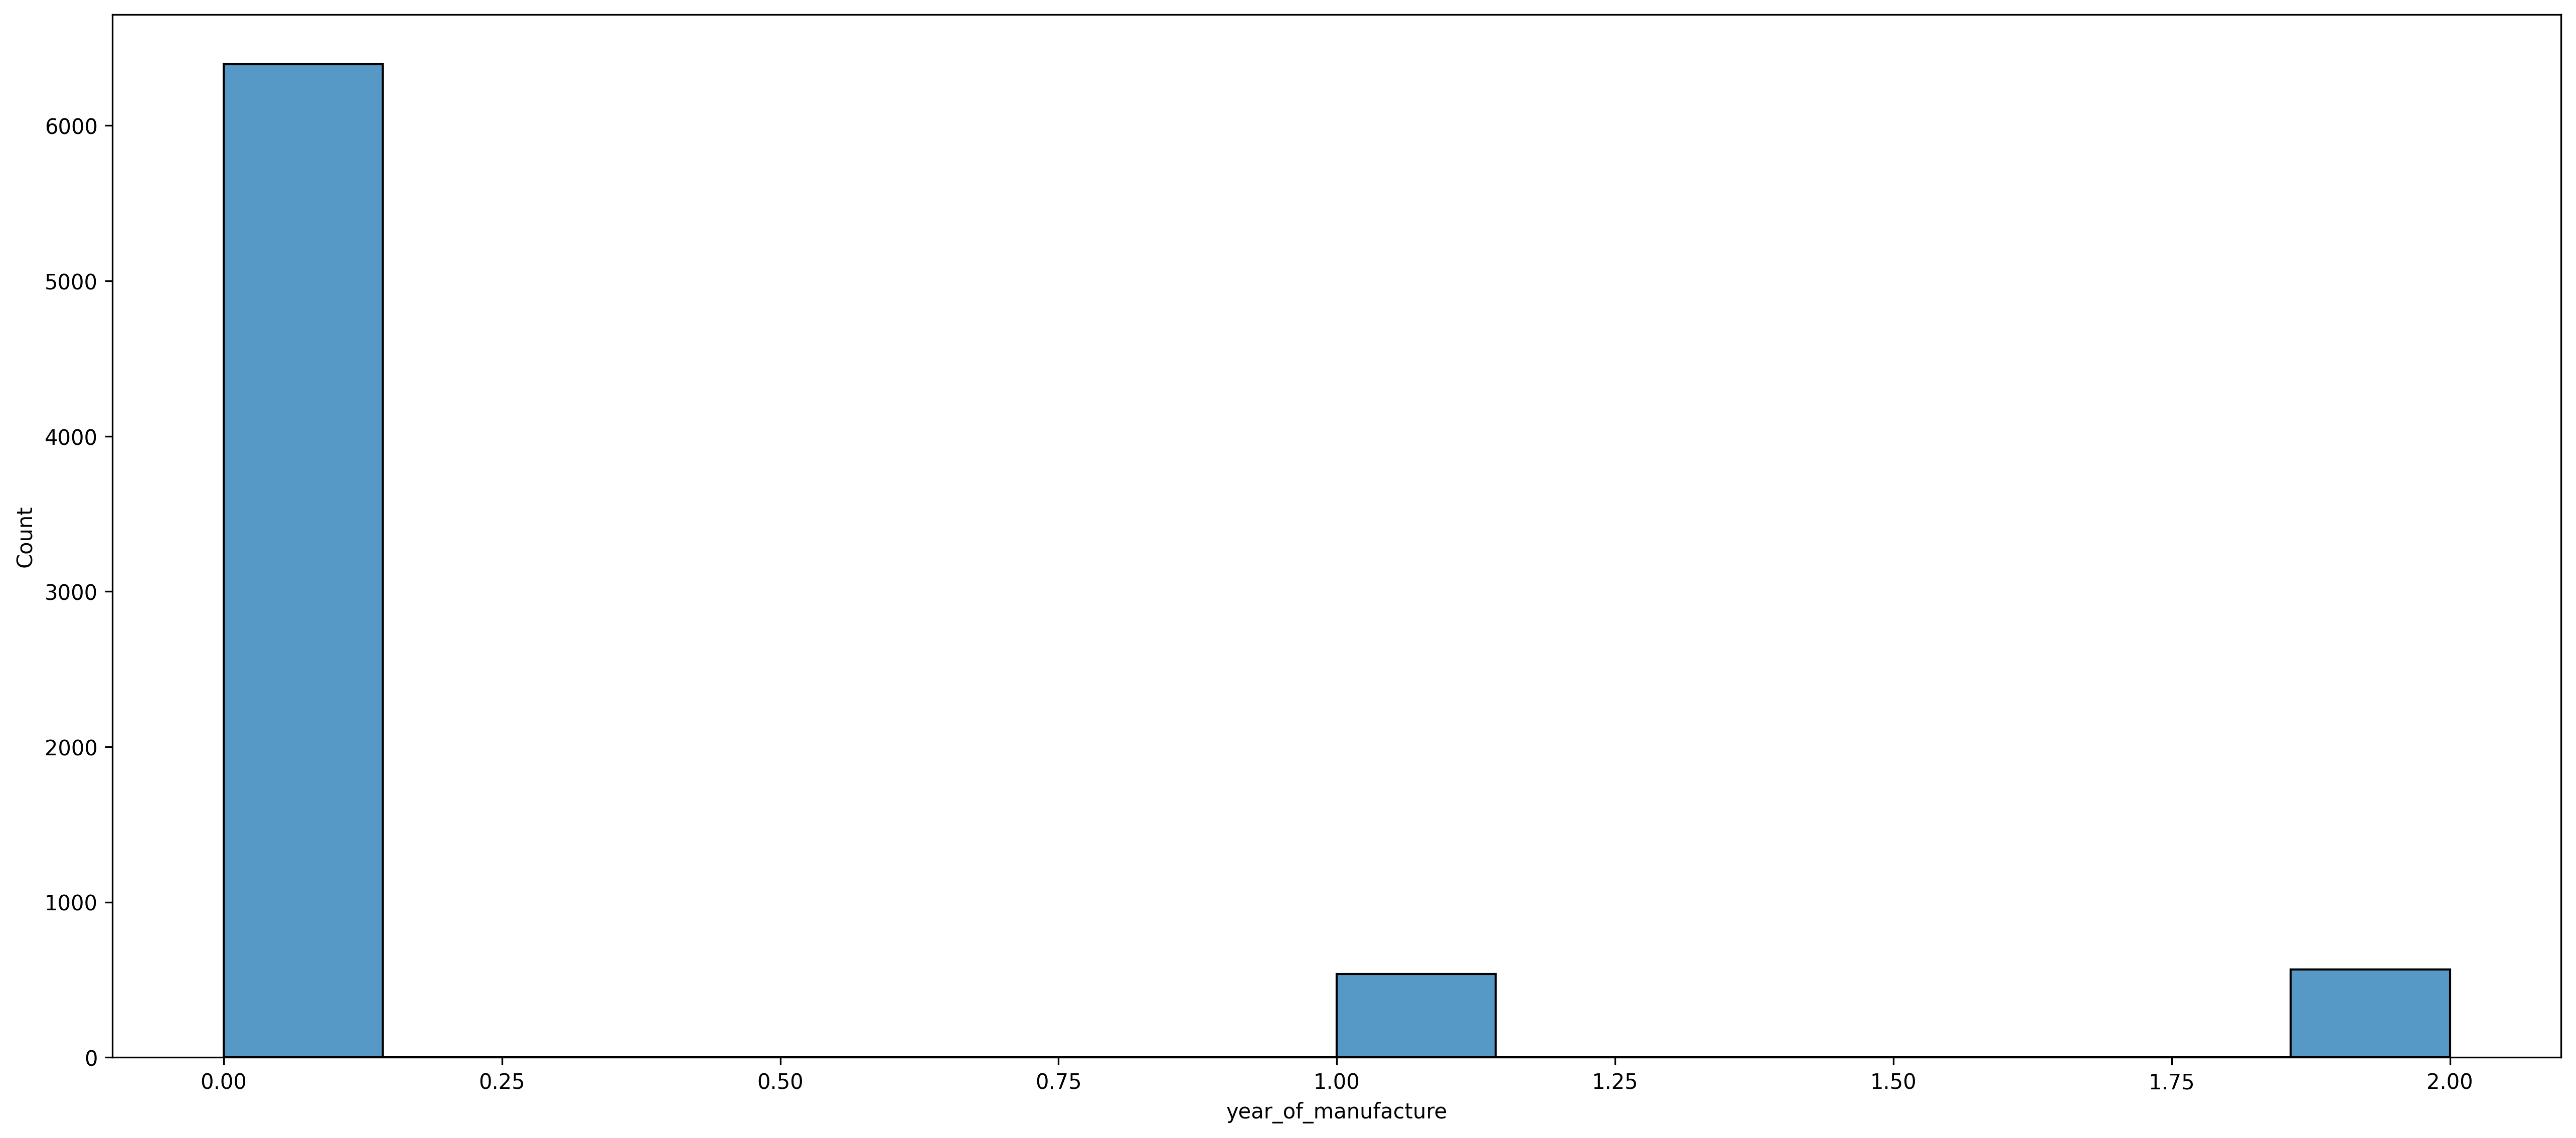

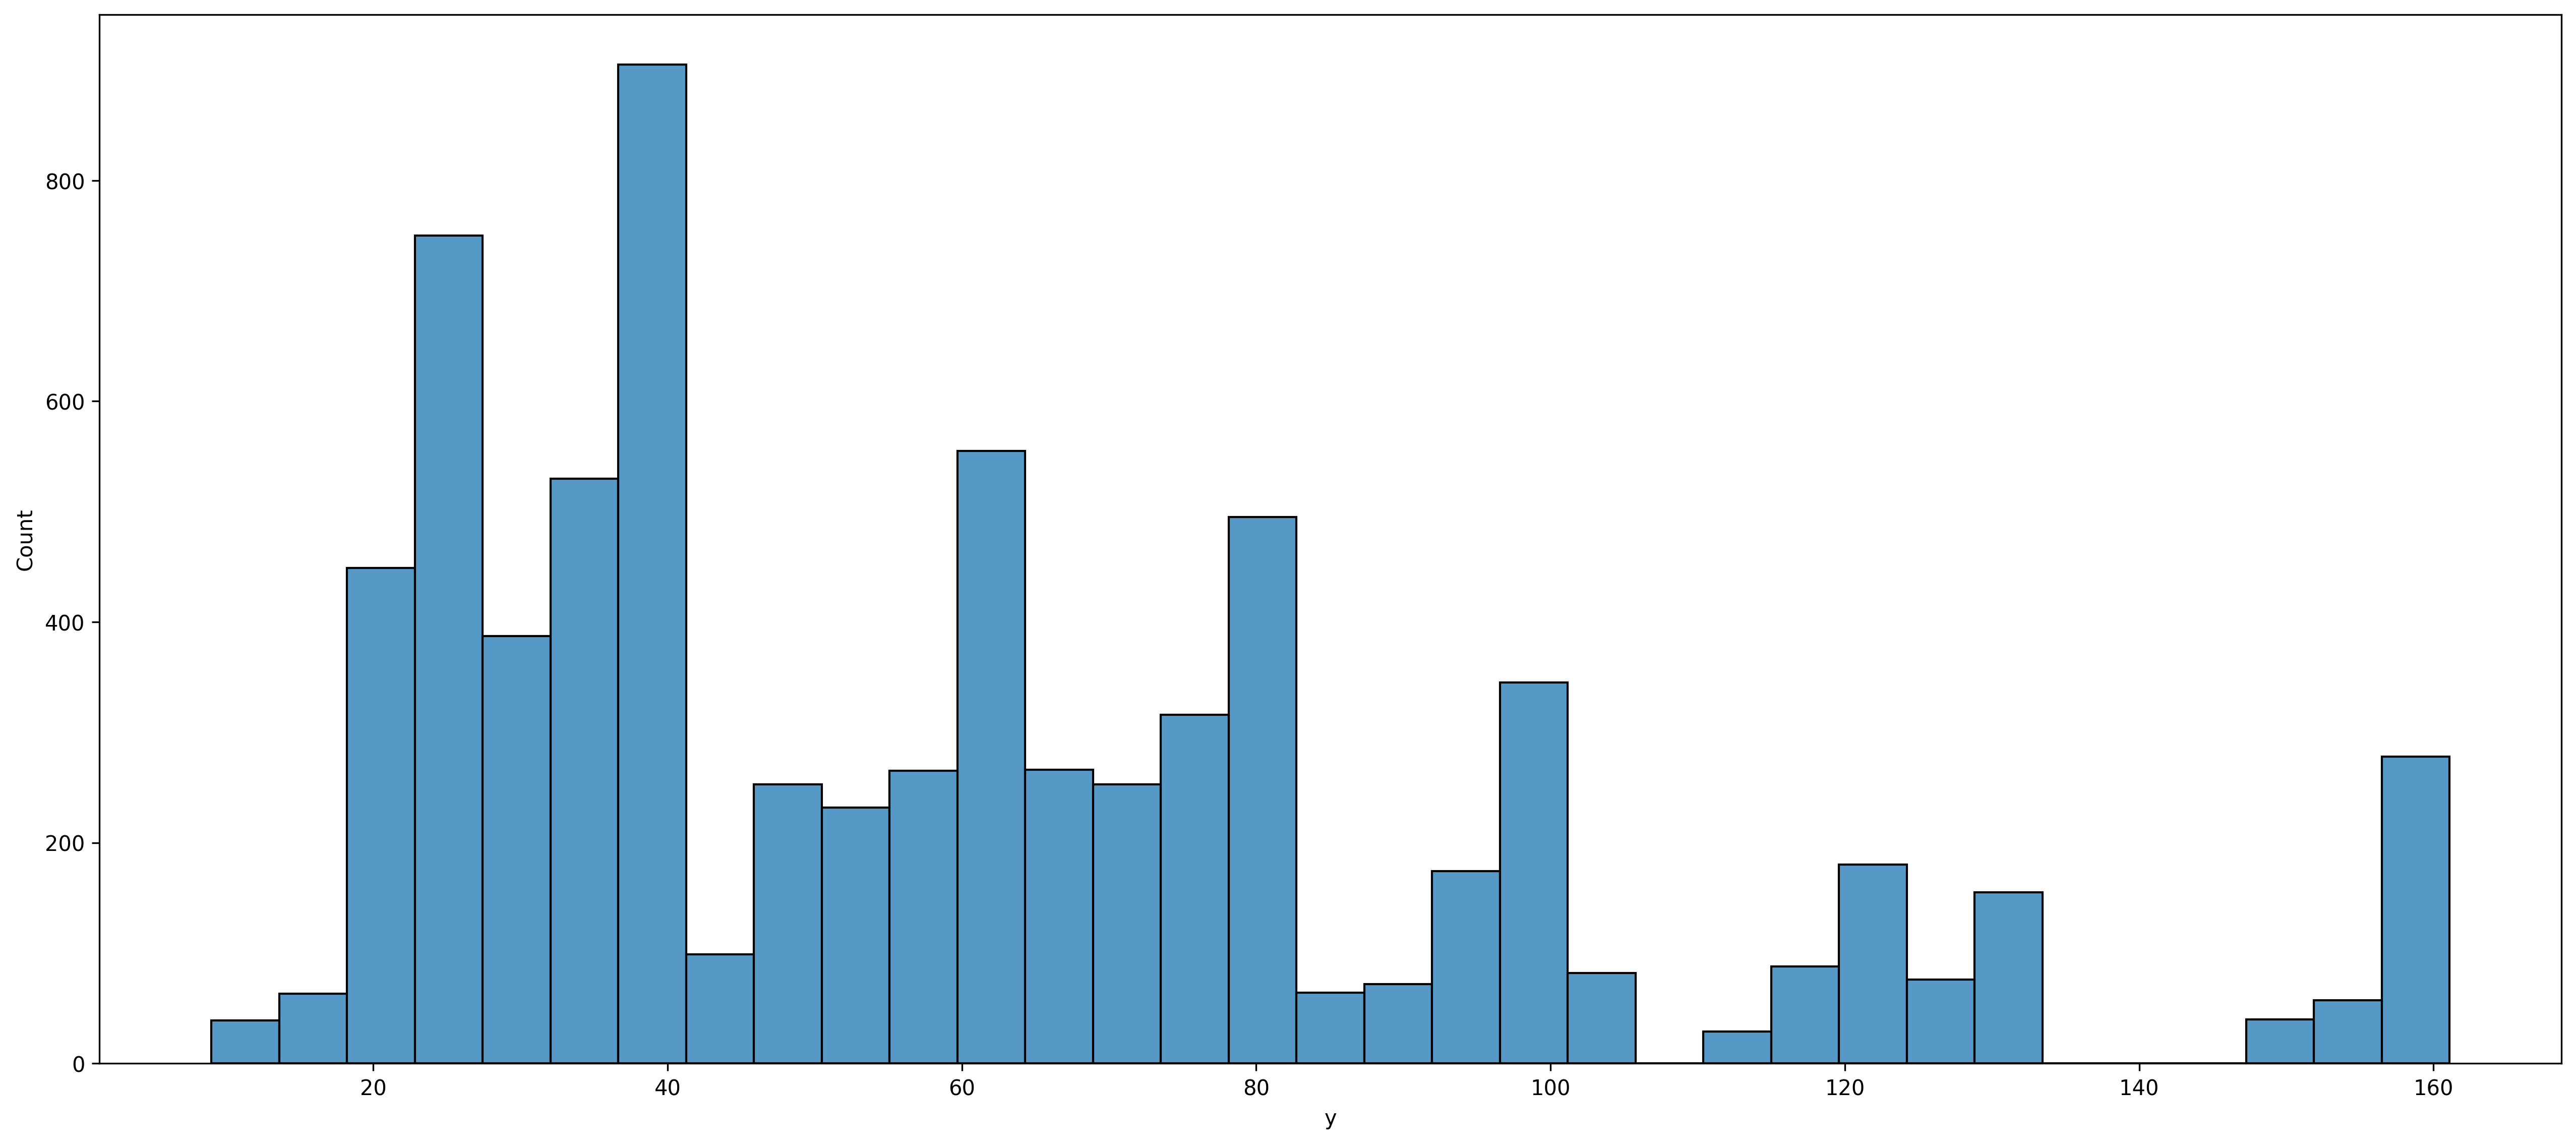

In [61]:
for col in train.select_dtypes(include='number').columns:
    sns.histplot(train[col])
    plt.show()

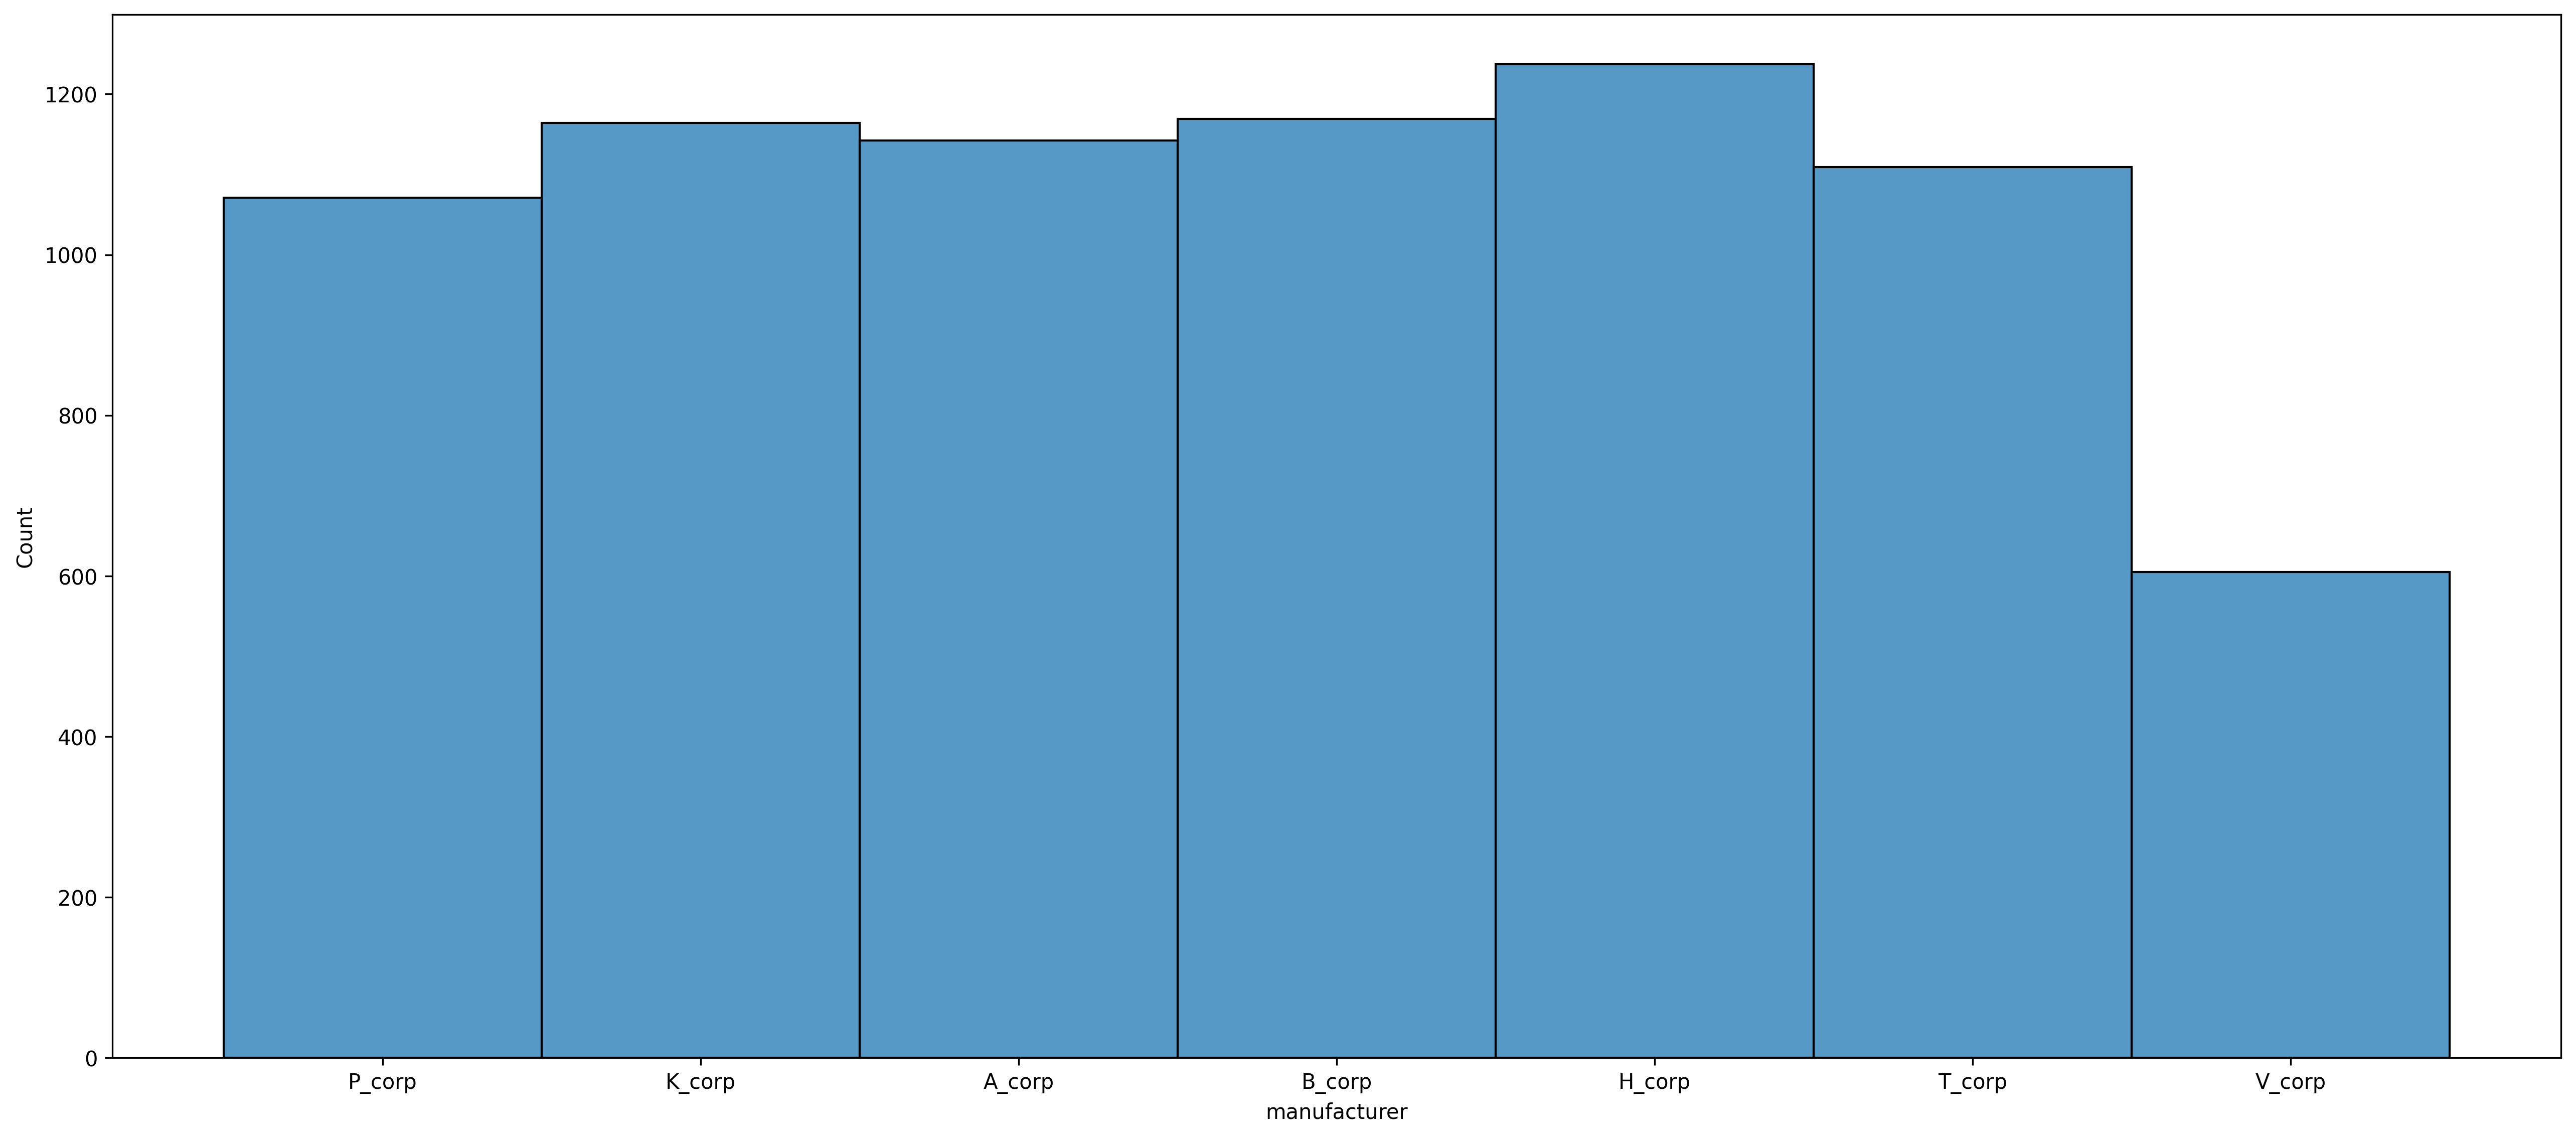

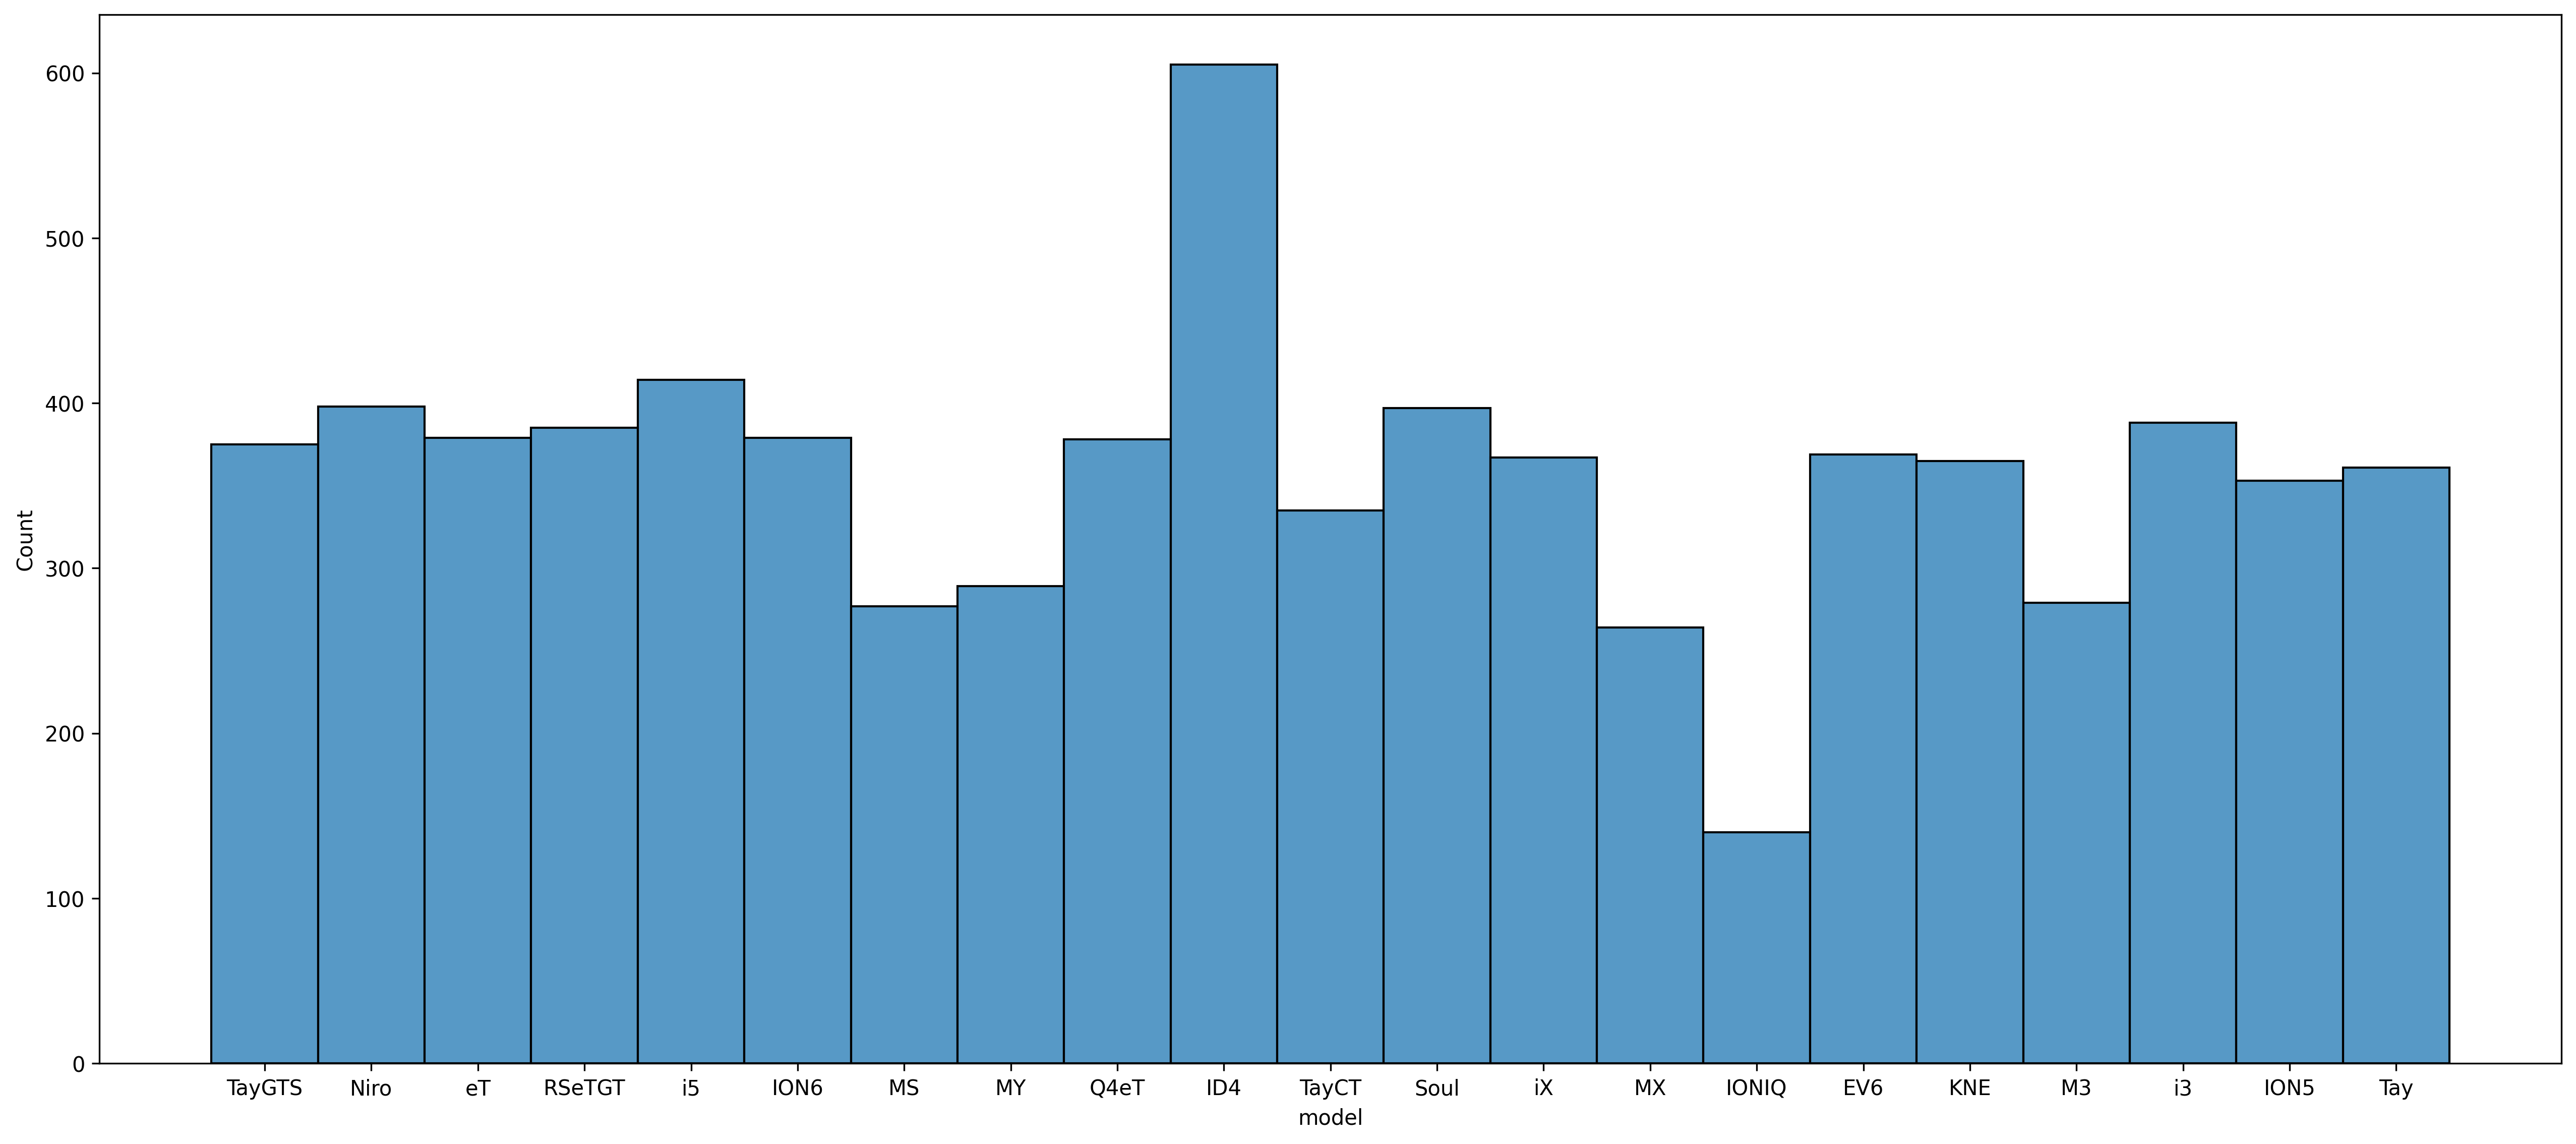

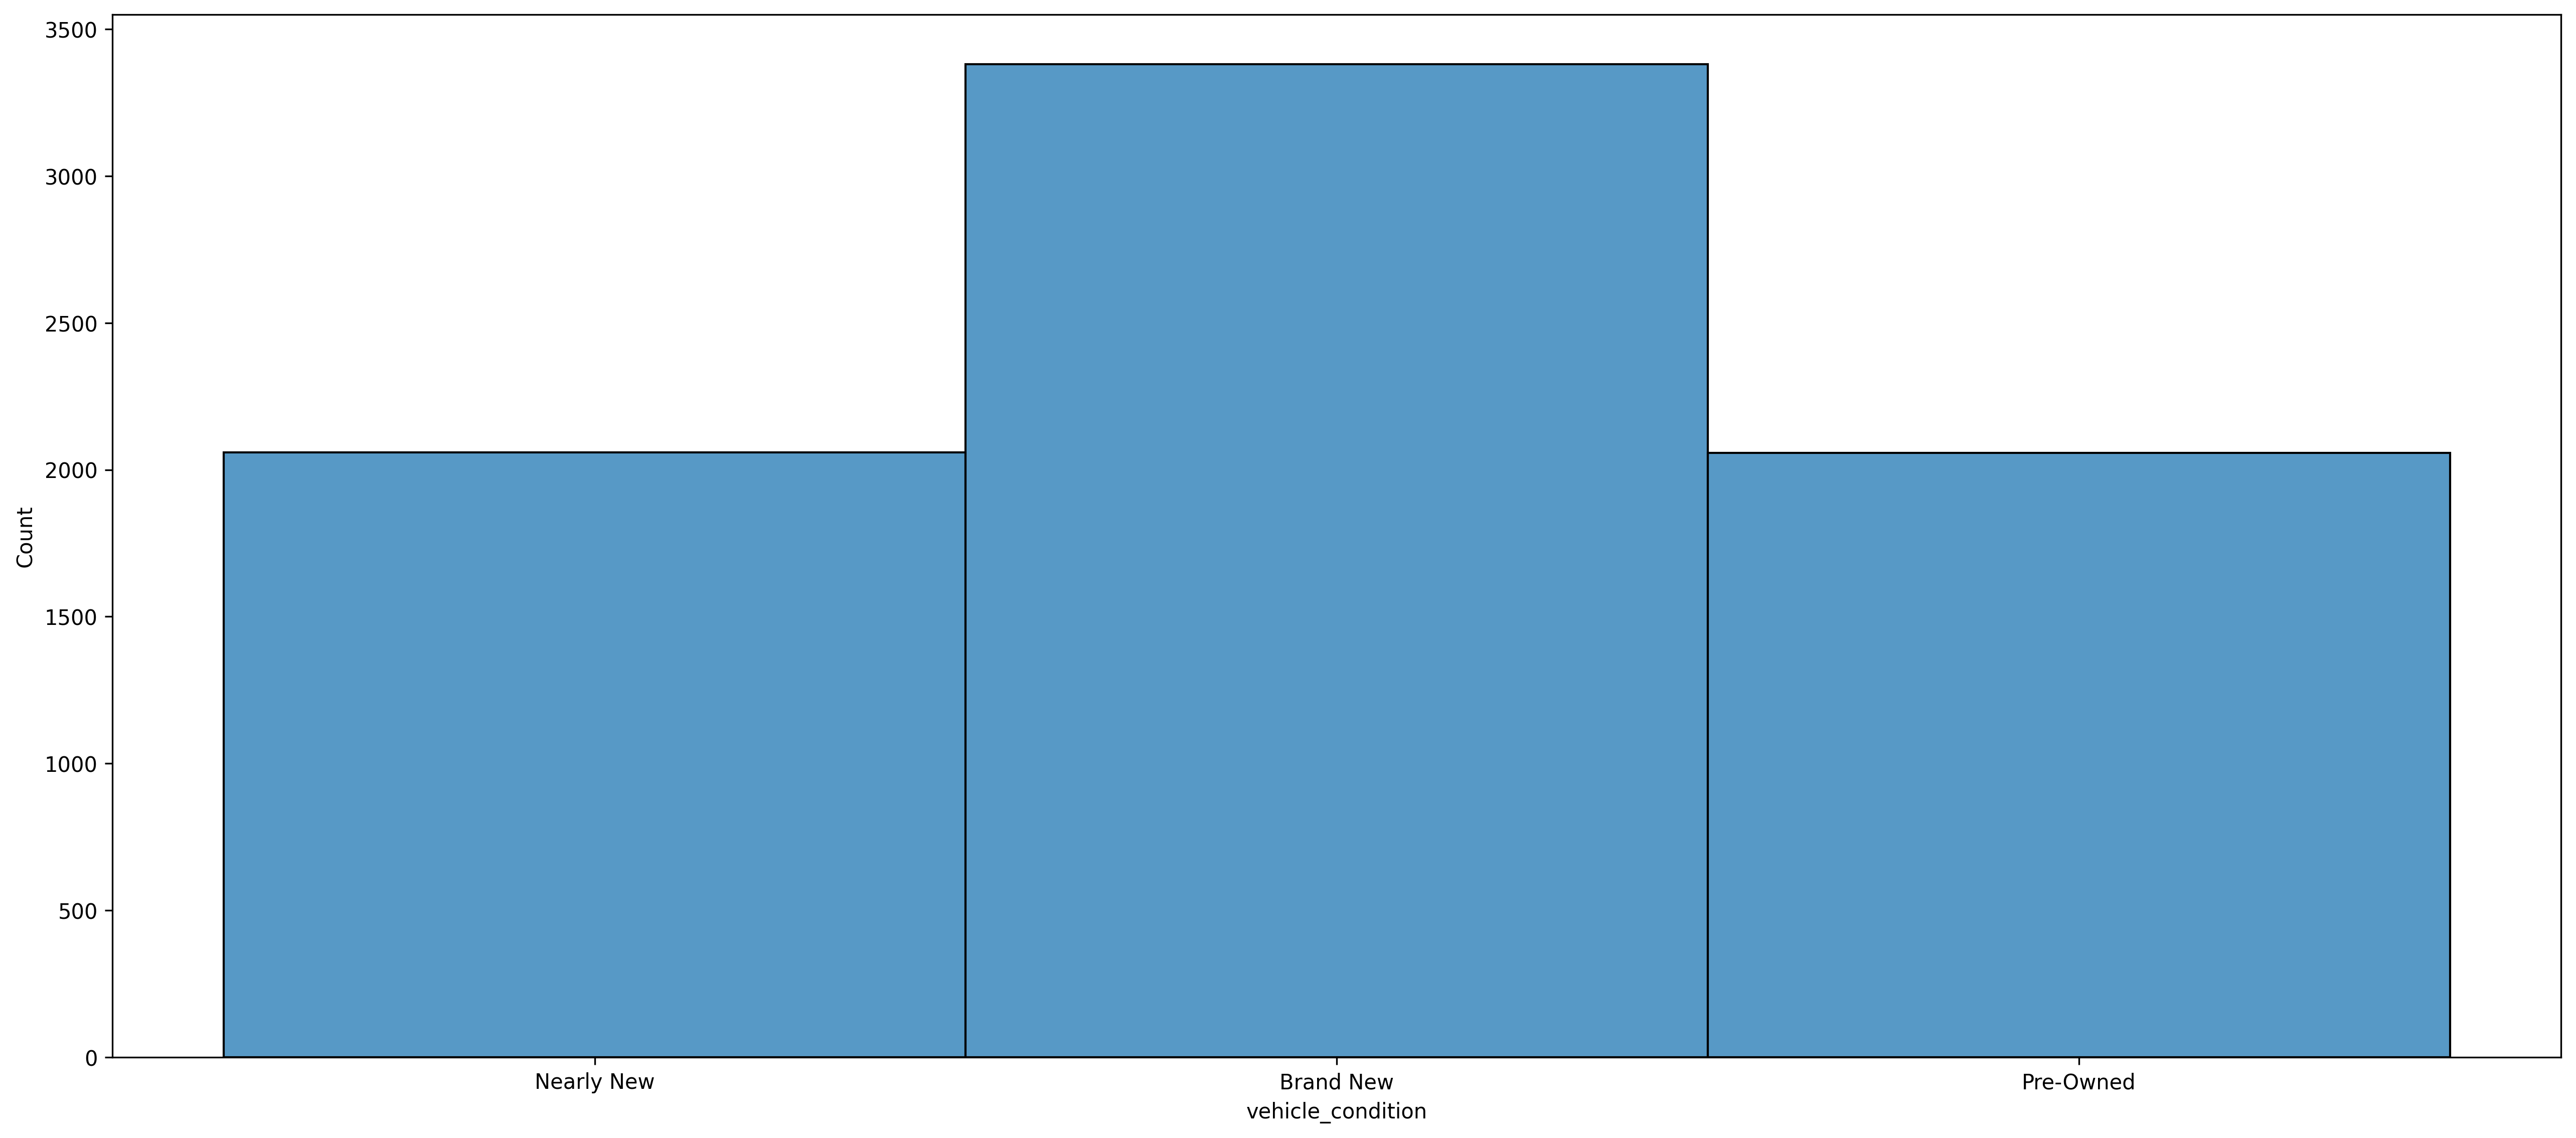

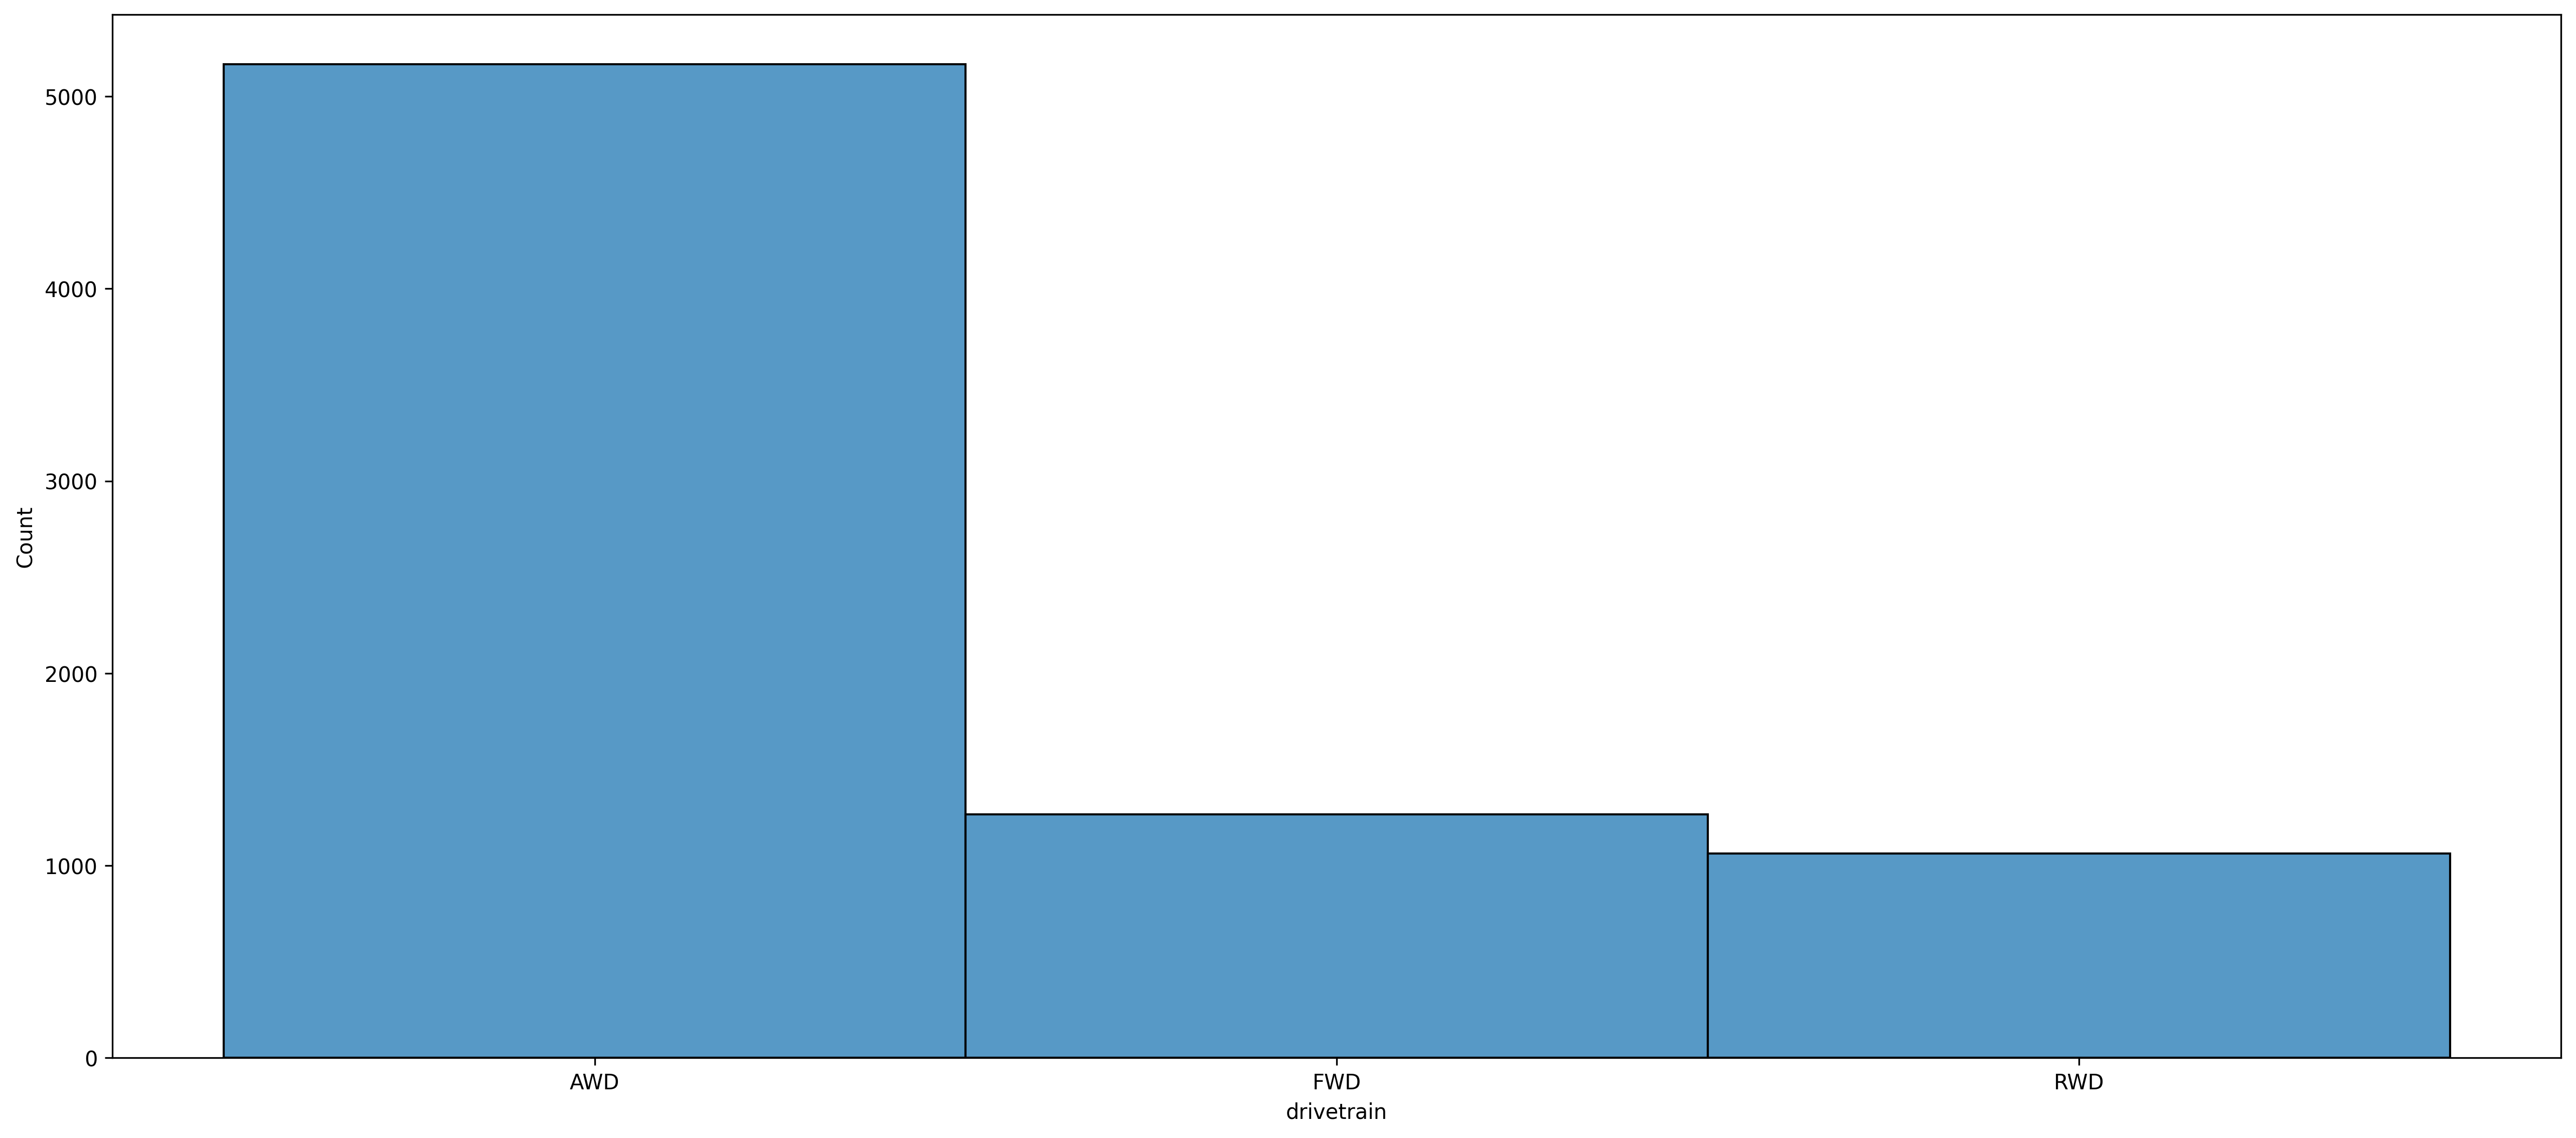

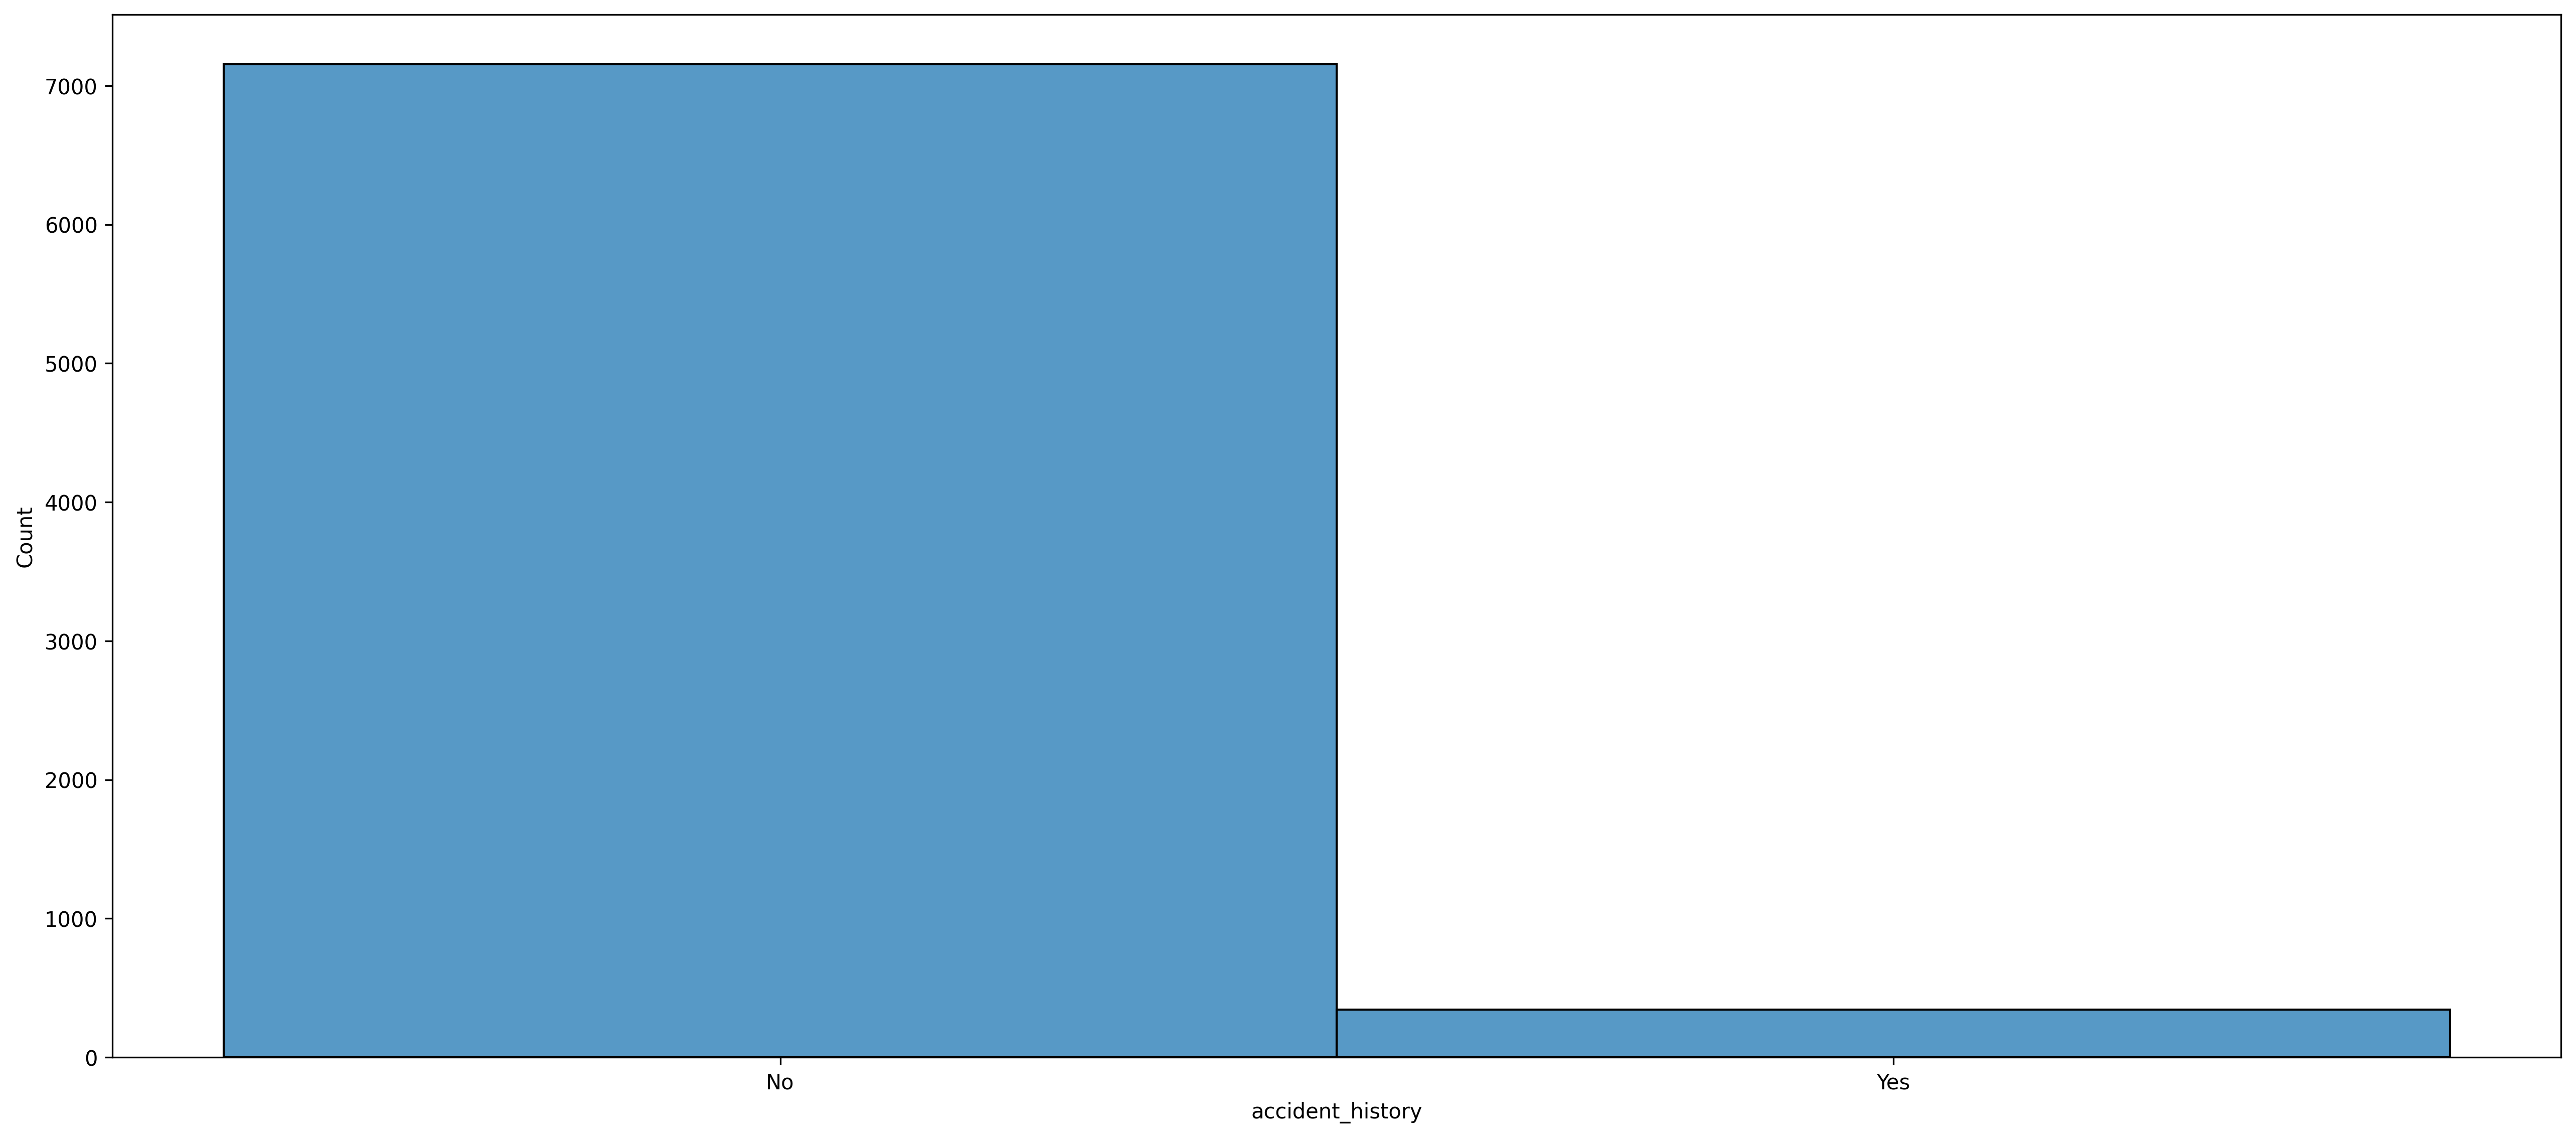

In [12]:
for col in train.select_dtypes(include='object').columns:
    sns.histplot(train[col])
    plt.show()

## Scaling

In [62]:
train

,manufacturer,model,vehicle_condition,battery_capacity,drivetrain,mileage,warranty_period,accident_history,year_of_manufacture,y
0,P_corp,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,K_corp,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,A_corp,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,A_corp,RSeTGT,Nearly New,0.000,AWD,21683,3,No,0,99.16
4,B_corp,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02
...,...,...,...,...,...,...,...,...,...,...
7492,H_corp,ION5,Brand New,0.000,AWD,3773,10,No,0,35.95
7493,B_corp,i3,Pre-Owned,46.000,RWD,135411,2,No,0,23.40
7494,P_corp,TayCT,Brand New,0.000,AWD,1363,2,No,0,120.00
7495,B_corp,i3,Nearly New,56.000,RWD,39445,6,No,2,24.00


In [63]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# select numerical columns
x_scaler.fit(train[train.select_dtypes(include='number').columns.drop('y')])
train.loc[:, train.select_dtypes(include='number').columns.drop('y')] = x_scaler.transform(train[train.select_dtypes(include='number').columns.drop('y')])
train.loc[:, 'y'] = y_scaler.fit_transform(train[['y']])
test.loc[:, test.select_dtypes(include='number').columns] = x_scaler.transform(test[test.select_dtypes(include='number').columns])

In [64]:
def inverse_y(y):
    if isinstance(y, pd.Series):
        y = y.values
    return y_scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1)

In [65]:
combined = pd.concat([train,test], axis=0, ignore_index=True)
FEATURES = combined.columns.drop("y")
CATS = []
HIGH_CARDINALITY = []

In [66]:
print(f"THE {len(FEATURES)} BASIC FEATURES ARE:")
for c in FEATURES:
    ftype = "numerical"
    if combined[c].dtype=="object":
        CATS.append(c)
        combined[c] = combined[c].fillna("NAN")
        combined[c],_ = combined[c].factorize()
        combined[c] -= combined[c].min()
        ftype = "categorical"
    if combined[c].dtype=="int64":
        combined[c] = combined[c].astype("int32")
    elif combined[c].dtype=="float64":
        combined[c] = combined[c].astype("float32")
        
    n = combined[c].nunique()
    print(f"{c} ({ftype}) with {n} unique values")
    if n>=25: HIGH_CARDINALITY.append(c)
    
train = combined.iloc[:len(train)].copy()
test = combined.iloc[len(train):].reset_index(drop=True).copy()

THE 9 BASIC FEATURES ARE:
manufacturer (categorical) with 7 unique values
model (categorical) with 21 unique values
vehicle_condition (categorical) with 3 unique values
battery_capacity (numerical) with 203 unique values
drivetrain (categorical) with 3 unique values
mileage (numerical) with 7633 unique values
warranty_period (numerical) with 11 unique values
accident_history (categorical) with 2 unique values
year_of_manufacture (numerical) with 3 unique values


In [67]:
train

,manufacturer,model,vehicle_condition,battery_capacity,drivetrain,mileage,warranty_period,accident_history,year_of_manufacture,y
0,0,0,0,1.176470,0,-0.555177,-1.572333,0,3.122858,2.656020
1,1,1,0,0.329432,1,-0.617550,0.329331,0,-0.390885,-0.936624
2,2,2,1,1.320746,0,-0.759541,0.646275,0,-0.390885,0.107467
3,2,3,0,-1.247658,0,-0.409508,-0.621501,0,-0.390885,1.005014
4,3,4,2,0.470751,0,2.426016,-1.255389,0,-0.390885,-0.008513
...,...,...,...,...,...,...,...,...,...,...
7492,4,19,1,-1.247658,0,-0.733962,1.597107,0,-0.390885,-0.719947
7493,3,18,2,0.047809,2,1.650768,-0.938445,0,-0.390885,-1.062428
7494,0,10,1,-1.247658,0,-0.777621,-0.938445,0,-0.390885,1.573724
7495,3,18,0,0.329432,2,-0.087735,0.329331,0,3.122858,-1.046054


<Axes: >

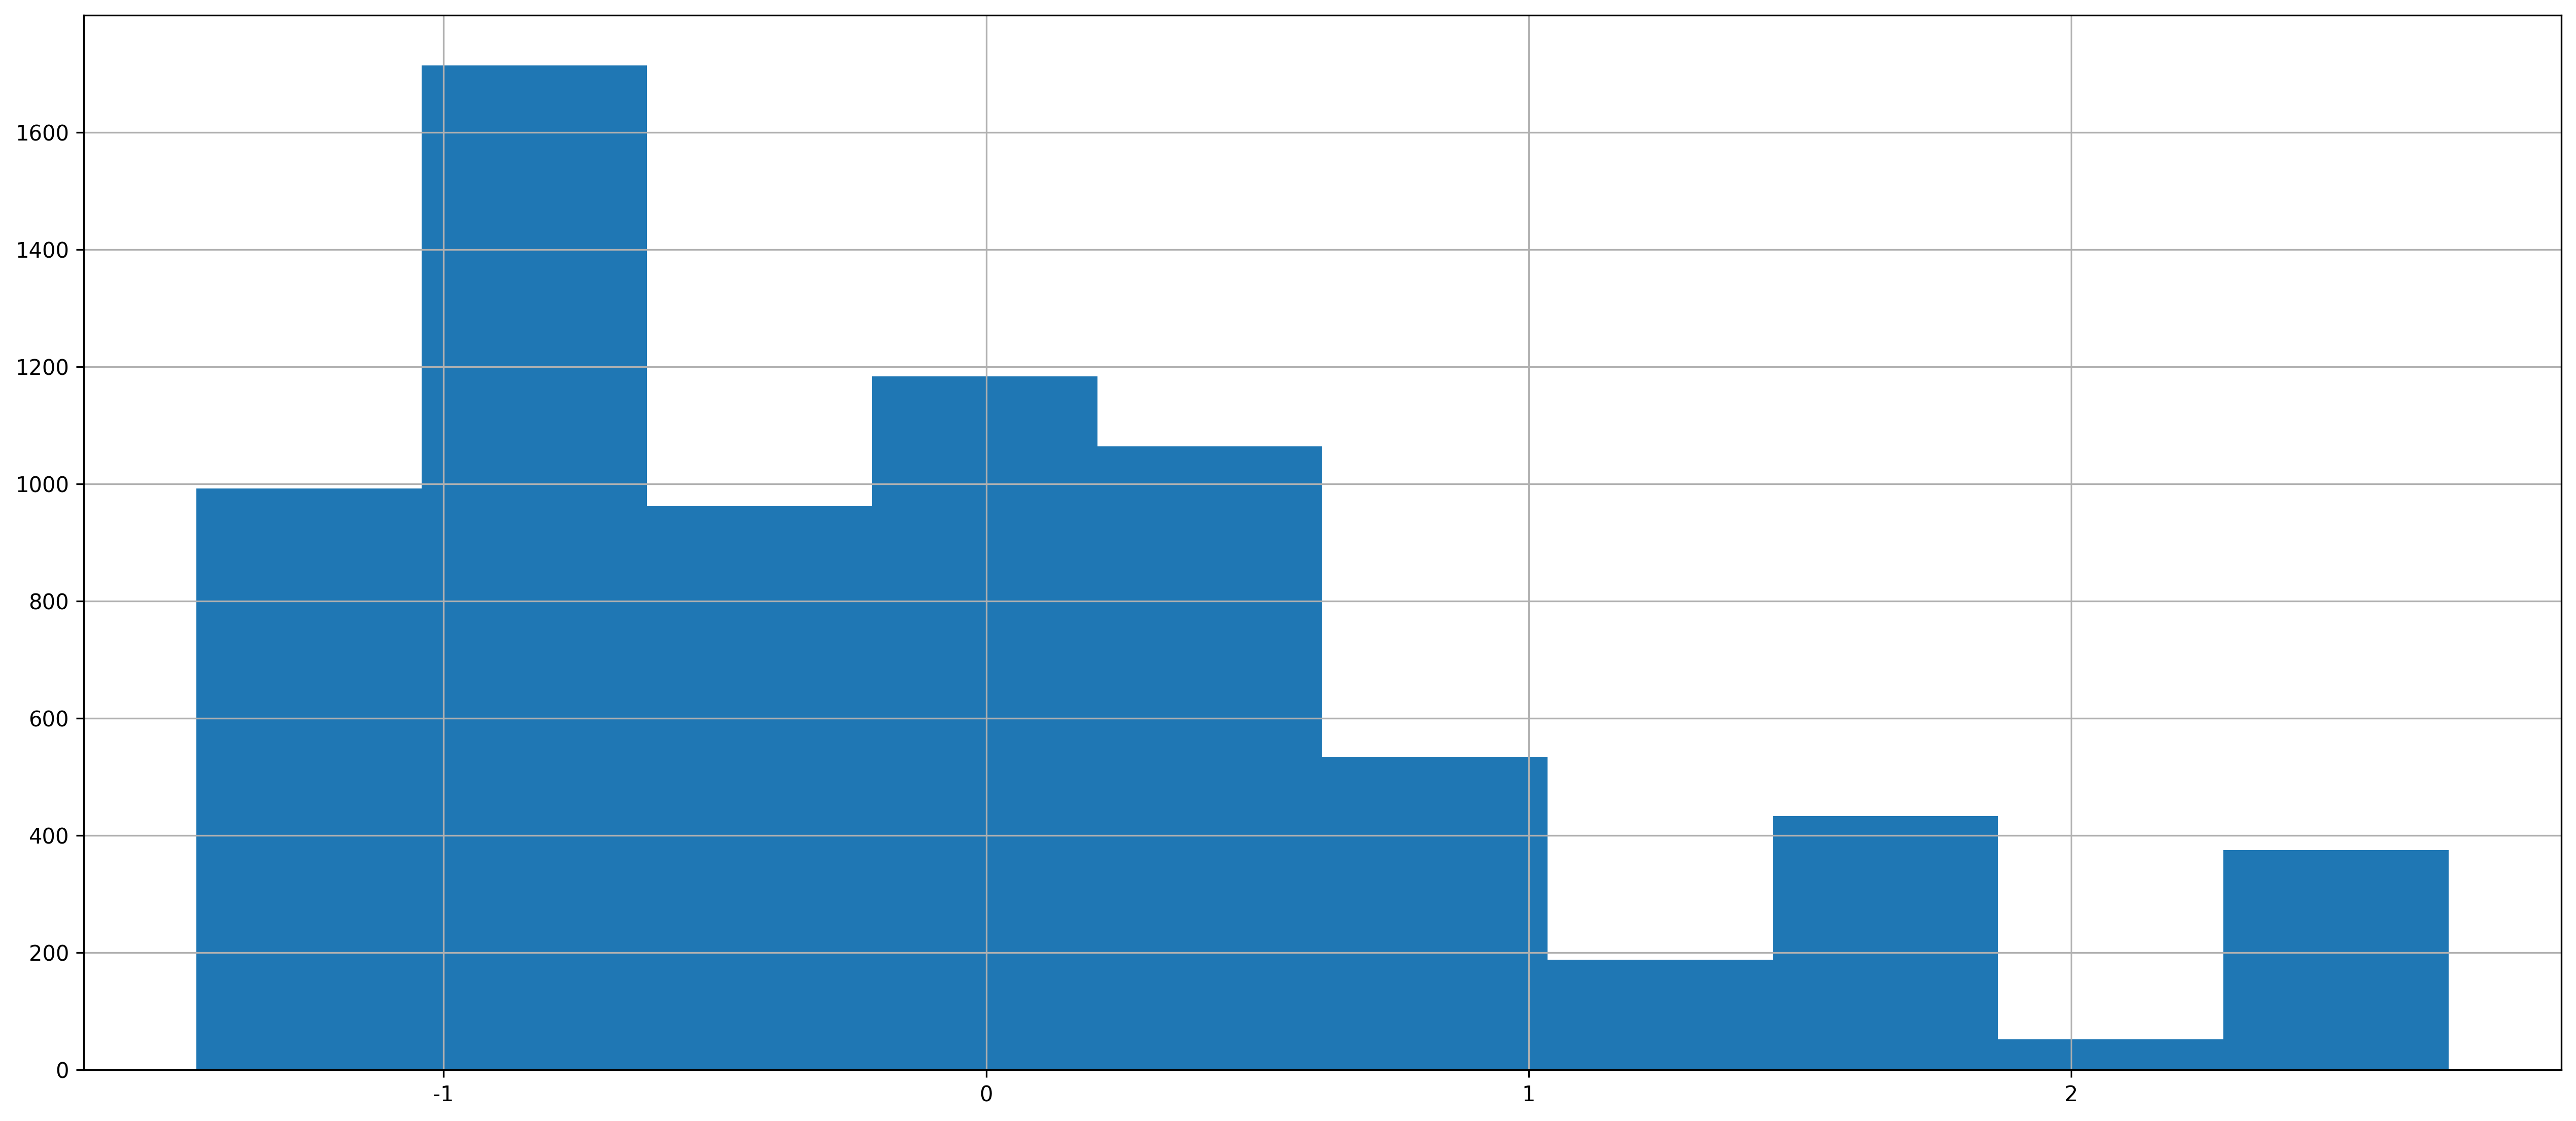

In [68]:
(train.y).hist()

In [18]:
# svr
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
model = SVR(
    C=10.0,
    epsilon=0.1,
    kernel='rbf',
    gamma='scale',
    max_iter=-1,
    shrinking=True,
    # tol=0.001,
    cache_size=1000,
    verbose=False,
)
X_train, X_valid, y_train, y_valid = train_test_split(train[FEATURES], train['y'], test_size=0.2, random_state=SEED)

model.fit(X_train, y_train)
root_mean_squared_error(inverse_y(y_valid), inverse_y(model.predict(X_valid)))

12.041205733751806

In [19]:
inverse_y(model.predict(X_valid))

array([ 43.45899605,  41.34321292, 116.02776957, ...,  64.32134278,
        66.2602765 ,  39.56853542])

In [20]:
inverse_y(y_valid)

array([ 41.71,  23.43, 124.04, ...,  64.06,  68.87,  27.42])

### Simple model with Catboost baseline

In [21]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=SEED,
    verbose=0
)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import KFold

FOLD = 10
kf = KFold(n_splits=FOLD, shuffle=True, random_state=SEED)
oof = np.zeros(len(train))
pred = np.zeros(len(test))
rmse_list = []

for trn_idx, val_idx in kf.split(train):
    X_train, X_val = train.iloc[trn_idx], train.iloc[val_idx]
    y_train, y_val = train['y'].iloc[trn_idx], train['y'].iloc[val_idx]
    
    model.fit(X_train[FEATURES], y_train)
    oof[val_idx] = model.predict(X_val[FEATURES])
    pred += model.predict(test[FEATURES]) / FOLD
    
    rmse = root_mean_squared_error(y_val, oof[val_idx])
    print(f"RMSE: {rmse}")
    rmse_list.append(rmse)

print(f"RMSE: {np.mean(rmse_list)}")
# train['base_line'] = oof
# test['base_line'] = pred

RMSE: 1.4789852000170378
RMSE: 1.442665592096978
RMSE: 1.361879031487346
RMSE: 1.6182065183291983
RMSE: 1.3548857147370876
RMSE: 1.4408212191217389
RMSE: 1.3846634498046306
RMSE: 1.1510832572668073
RMSE: 1.3079517711296778
RMSE: 1.4086226423950168
RMSE: 1.394976439638552


In [70]:
import optuna
from optuna.trial import Trial
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import KFold

def objective(trial: Trial, X, y):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'od_type': 'Iter',
        'od_wait': 25,
        'loss_function': 'RMSE',
        'eval_metric': 'RMSE',
        'random_seed': SEED,
        'verbose': 0,
        # gpu
        'task_type': 'GPU',
        'devices': '0',
    }
    
    FOLD = 10
    kf = KFold(n_splits=FOLD, shuffle=True, random_state=SEED)
    oof = np.zeros(len(X))
    rmse_list = []

    for trn_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

        model = CatBoostRegressor(**param)
        model.fit(X_train[FEATURES], y_train)
        oof[val_idx] = model.predict(X_val[FEATURES])

        rmse = root_mean_squared_error(y_val, oof[val_idx])
        rmse_list.append(rmse)

    return np.mean(rmse_list)

FOLD = 10
study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective(trial, train.drop(columns=['y']), train['y']), n_trials=100)

[I 2025-01-24 03:05:28,824] A new study created in memory with name: no-name-19d85c79-b494-4050-b4d6-42c56035e4e5
[I 2025-01-24 03:06:21,081] Trial 0 finished with value: 1.4336209132336926 and parameters: {'iterations': 240, 'learning_rate': 0.26232162541778403, 'depth': 10, 'l2_leaf_reg': 9.583951419063254, 'bagging_temperature': 0.21712863437845042, 'random_strength': 0.9187820337363163}. Best is trial 0 with value: 1.4336209132336926.
[I 2025-01-24 03:06:33,790] Trial 1 finished with value: 1.423427341743748 and parameters: {'iterations': 141, 'learning_rate': 0.15145677901086618, 'depth': 9, 'l2_leaf_reg': 0.02095504944287425, 'bagging_temperature': 0.8294256608081401, 'random_strength': 0.14991661507838228}. Best is trial 1 with value: 1.423427341743748.
[I 2025-01-24 03:07:25,680] Trial 2 finished with value: 1.4528405185138134 and parameters: {'iterations': 645, 'learning_rate': 0.2596214135932194, 'depth': 3, 'l2_leaf_reg': 1.2677780893002668, 'bagging_temperature': 0.65310750

In [71]:
study.best_params

{'iterations': 662,
 'learning_rate': 0.25188255202982335,
 'depth': 10,
 'l2_leaf_reg': 6.234514299519463,
 'bagging_temperature': 0.17940146832820428,
 'random_strength': 0.603274586005211}

In [23]:
# 'iterations': 662,
#  'learning_rate': 0.25188255202982335,
#  'depth': 10,
#  'l2_leaf_reg': 6.234514299519463,
#  'bagging_temperature': 0.17940146832820428,
#  'random_strength': 0.603274586005211
model = CatBoostRegressor(
    iterations=662,
    learning_rate=0.25188255202982335,
    depth=10,
    l2_leaf_reg=6.234514299519463,
    bagging_temperature=0.17940146832820428,
    random_strength=0.603274586005211,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=SEED,
    verbose=0,
    # gpu
    # task_type='GPU',
    # devices='0',
)
model.fit(train[FEATURES], train['y'])

In [24]:
root_mean_squared_error(inverse_y(train['y']), inverse_y(model.predict(train[FEATURES])))

0.731412711799948

In [26]:
import autogluon
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label='y', path='autogluon').fit(train)
predictor.leaderboard(train, silent=True)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.5
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:12:58 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6000
CPU Count:          8
Memory Avail:       5.41 GB / 16.00 GB (33.8%)
Disk Space Avail:   71.61 GB / 460.43 GB (15.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high' 

[1000]	valid_set's rmse: 0.0478121
[2000]	valid_set's rmse: 0.0468895
[3000]	valid_set's rmse: 0.0467364


	-0.0467	 = Validation score   (-root_mean_squared_error)
	7.15s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM ...
	-0.0356	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0417	 = Validation score   (-root_mean_squared_error)
	3.41s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0367	 = Validation score   (-root_mean_squared_error)
	1.87s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0379	 = Validation score   (-root_mean_squared_error)
	0.35s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.1098	 = Validation score   (-root_mean_squared_error)
	4.02s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-0.0369	 = Validation score   (-root_mean_squared_error)
	1.12s	 = Training   runtime
	0.0s	 = Validation runtime
Fitti

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.013237,-0.040811,root_mean_squared_error,0.021333,0.014477,0.005342,0.021333,0.014477,0.005342,1,True,2
1,ExtraTreesMSE,-0.018496,-0.037920,root_mean_squared_error,0.161518,0.026860,0.350939,0.161518,0.026860,0.350939,1,True,7
2,RandomForestMSE,-0.019616,-0.041699,root_mean_squared_error,0.141046,0.037152,3.410851,0.141046,0.037152,3.410851,1,True,5
3,LightGBMLarge,-0.025442,-0.041515,root_mean_squared_error,0.027823,0.003462,2.907133,0.027823,0.003462,2.907133,1,True,11
4,WeightedEnsemble_L2,-0.030401,-0.035412,root_mean_squared_error,0.163605,0.039552,3.998310,0.002580,0.000174,0.004906,2,True,12
5,CatBoost,-0.030480,-0.036697,root_mean_squared_error,0.032023,0.000862,1.870923,0.032023,0.000862,1.870923,1,True,6
6,XGBoost,-0.030851,-0.036916,root_mean_squared_error,0.016527,0.002157,1.119445,0.016527,0.002157,1.119445,1,True,9
7,LightGBM,-0.032610,-0.035574,root_mean_squared_error,0.019979,0.002226,0.582553,0.019979,0.002226,0.582553,1,True,4
8,KNeighborsUnif,-0.034659,-0.045906,root_mean_squared_error,0.016627,0.026930,3.190061,0.016627,0.026930,3.190061,1,True,1
9,NeuralNetTorch,-0.036501,-0.039340,root_mean_squared_error,0.023458,0.005683,84.314764,0.023458,0.005683,84.314764,1,True,10


In [70]:
pred = inverse_y(predictor.predict(test))

In [29]:
inverse_y(model.predict(test[FEATURES]))

array([130.37851996,  79.85348567,  65.15441029,  34.04055656,
        48.23441033,  98.61992078,  21.69589585,  40.25441253,
        81.172478  ,  24.47056799,  64.01855012,  62.44368713,
        40.3486117 , 100.31765675,  90.57249605,  22.98856792,
       124.74155467,  52.69258071,  59.58681537,  34.74969411,
        37.81660187, 160.38244773,  46.83663052,  55.8650169 ,
        23.16441216,  48.38069957,  78.90382265,  80.11770851,
        27.84531621, 125.55584355,  63.92827509,  40.60824634,
       114.47399864,  88.56370664,  36.10235168,  79.99900088,
        21.61100714,  39.70042024,  24.72250782, 120.93789024,
       130.17407429,  17.640366  , 119.35523627,  60.60107424,
        23.10032829, 100.18088333,  21.86410898,  73.94977158,
        62.68400416,  78.0026252 ,  35.69812347,  15.72612913,
        38.58179846, 125.72553111,  23.76634716,  27.63870952,
       156.15351987,  41.20418345, 160.09433979,  40.18803309,
        55.82053358, 126.77380494,  41.10281272, 121.03

# Encoding

In [62]:
# one hot encoding
train = pd.get_dummies(train, columns=CATS)
test = pd.get_dummies(test, columns=CATS)
train_X, valid_X, train_y, valid_y = train_test_split(train.drop("y", axis=1), train["y"], test_size=0.2, random_state=SEED)

In [64]:
train_X

,battery_capacity,mileage,warranty_period,year_of_manufacture,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_20,vehicle_condition_0,vehicle_condition_1,vehicle_condition_2,drivetrain_0,drivetrain_1,drivetrain_2,accident_history_0,accident_history_1
7330,56.359001,52301,1,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
6329,0.000000,5734,9,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False
1298,46.000000,93446,1,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
426,99.800003,612,8,0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
1600,0.000000,1424,10,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,76.093002,69056,2,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
5226,0.000000,232,10,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
5390,60.271999,161594,2,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
860,68.487999,64796,2,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False


In [63]:
model.fit(train_X, train_y)
root_mean_squared_error(inverse_y(valid_y), inverse_y(model.predict(valid_X)))

np.float64(1385.774496101624)

In [47]:
display(train)
display(test)

,battery_capacity,mileage,warranty_period,year_of_manufacture,y,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_20,vehicle_condition_0,vehicle_condition_1,vehicle_condition_2,drivetrain_0,drivetrain_1,drivetrain_2,accident_history_0,accident_history_1
0,86.077003,13642,0,2,159.66,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False
1,56.000000,10199,6,0,28.01,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False
2,91.199997,2361,7,0,66.27,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
3,0.000000,21683,3,0,99.16,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False
4,61.018002,178205,1,0,62.02,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,0.000000,3773,10,0,35.95,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False
7493,46.000000,135411,2,0,23.40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False
7494,0.000000,1363,2,0,120.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
7495,56.000000,39445,6,2,24.00,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False


,battery_capacity,mileage,warranty_period,year_of_manufacture,y,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14,model_15,model_16,model_17,model_18,model_19,model_20,vehicle_condition_0,vehicle_condition_1,vehicle_condition_2,drivetrain_0,drivetrain_1,drivetrain_2,accident_history_0,accident_history_1
0,76.093002,14057,2,0,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False
1,90.000000,7547,8,0,NaN,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
2,0.000000,7197,7,0,NaN,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True
3,68.478996,10357,7,1,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False
4,0.000000,7597,10,0,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,64.682999,117298,2,0,NaN,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
842,55.547001,72308,0,0,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
843,55.547001,124537,0,0,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False
844,69.646004,15629,4,0,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False


In [58]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb, time

model = XGBRegressor(
    n_estimators=100,
    objective="reg:squarederror",
    random_state=SEED,
    tree_method='gpu_hist',
    gpu_id=0,
    predictor="gpu_predictor",
    verbose=0
)
model = LGBMRegressor(
    n_estimators=100,
    random_state=SEED,
    device="gpu",
    gpu_device_id=0,
)

In [51]:
FOLD = 5
kf = KFold(n_splits=FOLD, shuffle=True, random_state=SEED)
oof = np.zeros(len(train))
pred = np.zeros(len(test))
rmse_list = []

for trn_idx, val_idx in kf.split(train):
    X_train, X_val = train.iloc[trn_idx], train.iloc[val_idx]
    y_train, y_val = train['y'].iloc[trn_idx], train['y'].iloc[val_idx]
    
    model.fit(X_train, y_train)
    oof[val_idx] = model.predict(X_val)
    pred += model.predict(test) / FOLD
    
    rmse = root_mean_squared_error(y_val, oof[val_idx])
    rmse_list.append(rmse)

print(f"RMSE: {np.mean(rmse_list)}")

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 41
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 8 dense feature groups (0.05 MB) transferred to GPU in 0.001008 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 62.221487
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in

In [48]:
rmse

0.2249572735820447

In [31]:
pred = model.predict(test)

In [71]:
pred

array([130.57498 ,  79.835106,  64.95885 ,  34.953278,  47.748886,
        99.99071 ,  21.956839,  40.150288,  81.38957 ,  24.614523,
        63.86313 ,  62.642517,  40.252907, 100.20664 ,  90.79828 ,
        23.316362, 126.01592 ,  52.667297,  60.132004,  34.59364 ,
        37.865673, 160.1877  ,  47.07614 ,  55.813587,  22.95566 ,
        47.860493,  78.85924 ,  79.956154,  27.910986, 126.058586,
        63.776665,  40.798786, 114.79362 ,  88.165855,  35.632717,
        79.99875 ,  22.31391 ,  40.10574 ,  24.635847, 121.090836,
       126.0769  ,  16.979097, 119.55875 ,  60.734886,  22.942339,
       100.1816  ,  21.82134 ,  74.06587 ,  62.533455,  77.95339 ,
        35.556957,  16.49798 ,  38.695824, 126.15693 ,  23.868605,
        27.899347, 155.92575 ,  41.147476, 159.89566 ,  40.255207,
        55.830276, 125.05096 ,  40.82151 , 120.96688 ,  40.11297 ,
        34.021843,  72.228775,  50.390007,  99.86958 ,  22.946615,
        47.629505,  27.879316,  64.2612  ,  38.712475, 124.977

In [32]:
pred.shape, test.shape

((846,), (846, 10))

In [72]:
submission = pd.read_csv('./data/sample_submission.csv')
submission['가격(백만원)'] = inverse_y(pred)
submission.to_csv('submission.csv', index=False)